# House's Prices Prediction

### The problem
In the "House Prices - Advanced Regression Techniques" project, our goal is to develop a robust regression model capable of accurately predicting house prices. This task is crucial in real estate as it enables homeowners, buyers, and sellers to make informed decisions about property transactions. The dataset provided contains a wealth of information about various attributes of residential properties, offering a rich source of features to build an effective predictive model.

### Objectives
- Thoroughly explore and understand the dataset.
- Gain insights into the factors that influence house prices.
- Evaluate various regression algorithms and select the most promising candidates.
- Fine-tune their hyperparameters to optimize performance.

## Import Necessary Library

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.gridspec as gridspec 
from scipy import stats
import seaborn as sns
sns.set_style('whitegrid')

import warnings
warnings.simplefilter(action='ignore')

from sklearn.compose import ColumnTransformer
from sklearn.compose import make_column_transformer
from sklearn.pipeline import Pipeline

from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder
from sklearn.preprocessing import RobustScaler, FunctionTransformer
from sklearn.base import TransformerMixin

from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score, GridSearchCV, KFold, RandomizedSearchCV, train_test_split
import math
import sklearn.model_selection as ms
import sklearn.metrics as sklm

## Read Data from Dataset

In [2]:
train = pd.read_csv(r'D:\DATN\House_Prediction_Prices\Dataset\train.csv')
test = pd.read_csv(r'D:\DATN\House_Prediction_Prices\Dataset\test.csv')
test_id = test['Id']
df = train

In [3]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
test.sample(5)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
200,1661,60,RL,110.0,14257,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2009,WD,Normal
980,2441,30,RM,56.0,4480,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,2,2007,WD,Normal
513,1974,60,RL,85.0,10574,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,7,2008,WD,Normal
319,1780,60,RL,78.0,11419,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,GdWo,NaN,0,12,2009,WD,Normal
886,2347,20,FV,75.0,9000,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2007,New,Partial


## EDA (Exploratory Data Analysis) Khai Phá Dữ Liệu

In [5]:
train = df
print(f"Number of rows and number of columns in the train dataset are {train.shape[0]} and {train.shape[1]}")
print(f"Number of rows and number of columns in the test dataset are {test.shape[0]} and {test.shape[1]}")

Number of rows and number of columns in the train dataset are 1460 and 81
Number of rows and number of columns in the test dataset are 1459 and 80


In [6]:
train.info() # Check data information

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

We see in your train's dataset has 1460 entries and 81 columns, memory usage about 924 kb

In [7]:
train.describe() # Describe numberical dataset

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [83]:
train['SalePrice'].describe()

count    1460.000000
mean       12.024057
std         0.399449
min        10.460271
25%        11.775105
50%        12.001512
75%        12.273736
max        13.534474
Name: SalePrice, dtype: float64

Describe() is a function to Statistic the numberrical field, It provide about quantity,mean,std, min, max like above table

In [8]:
num_features = df.select_dtypes(include=np.number).columns
print(num_features)
# We take columns with numeric values

Index(['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
       'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
       'MiscVal', 'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')


In [9]:
cat_features = df.select_dtypes(include=object).columns
print(cat_features)
# We take columns with categorical values

Index(['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature',
       'SaleType', 'SaleCondition'],
      dtype='object')


Now We will look at the data distribution of the fields

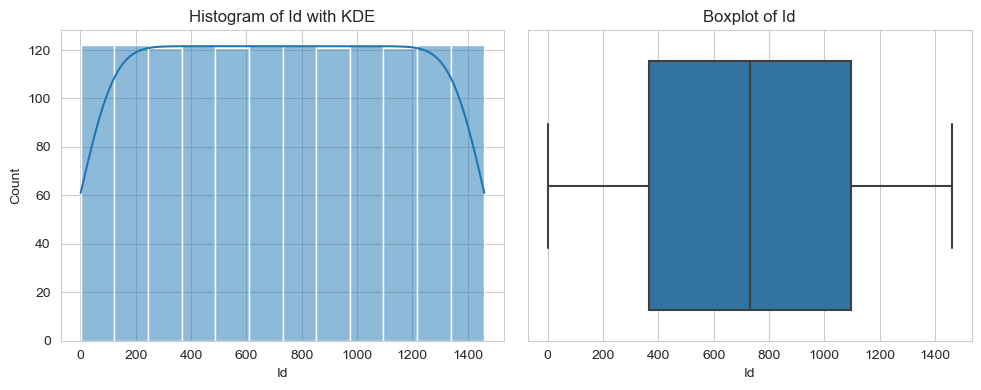

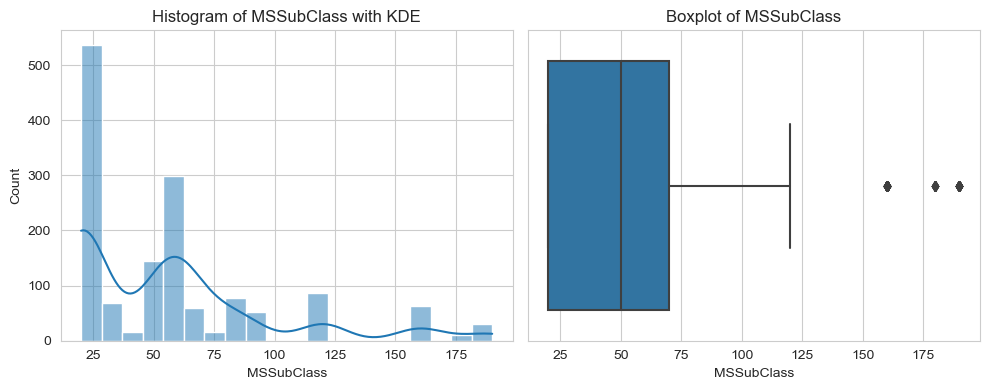

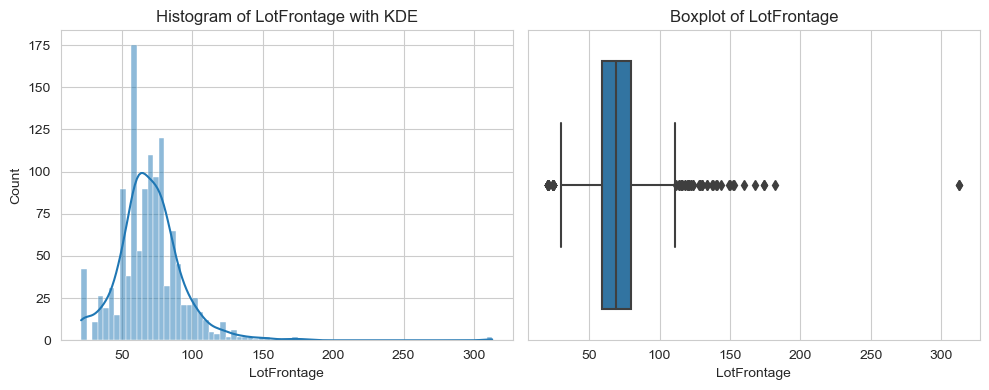

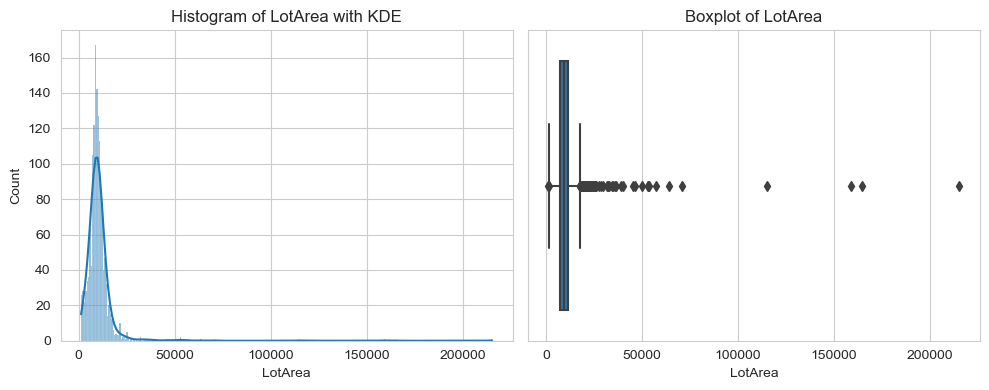

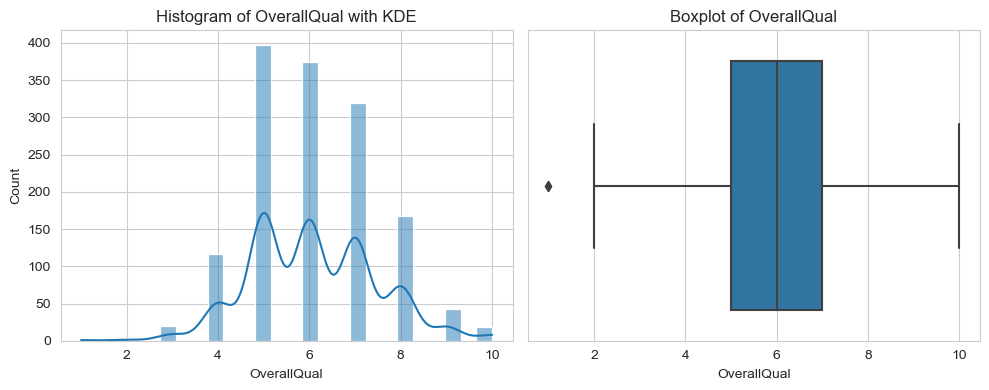

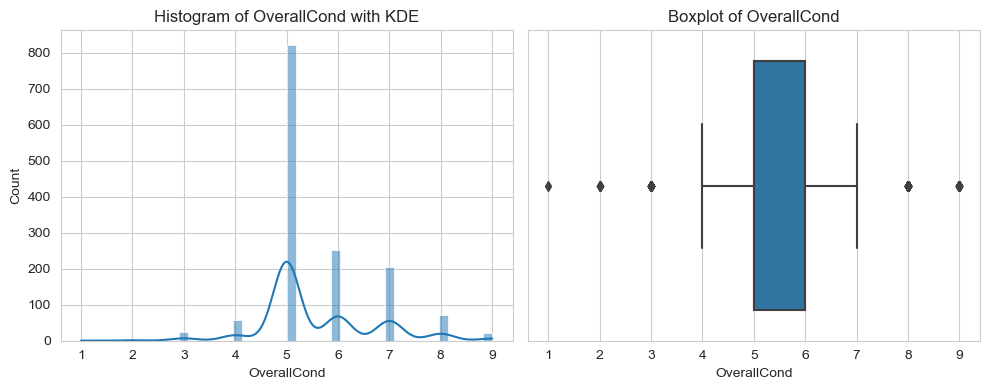

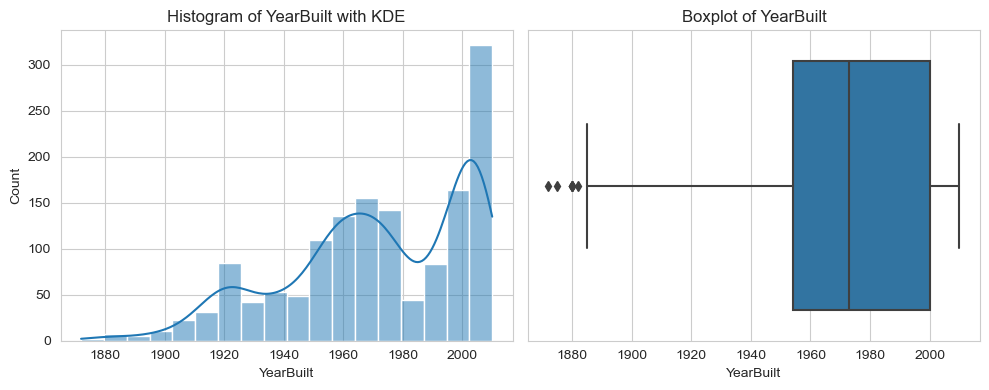

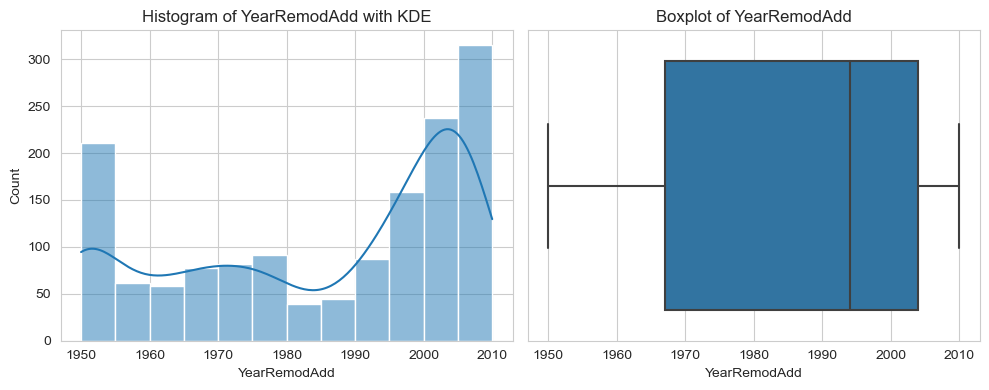

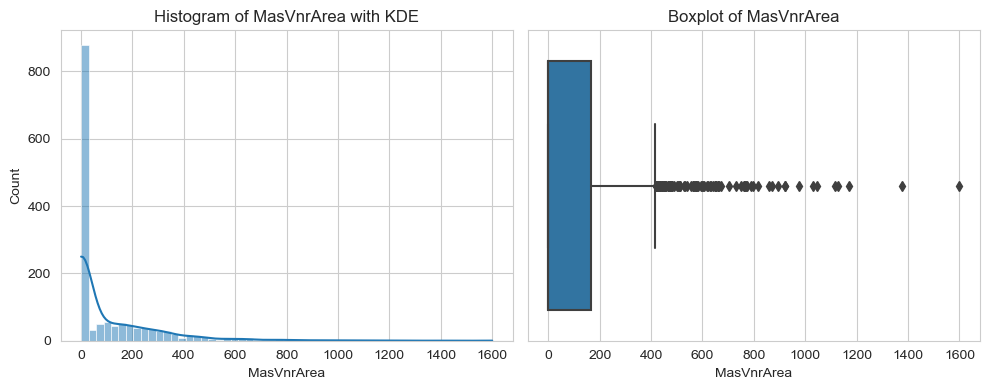

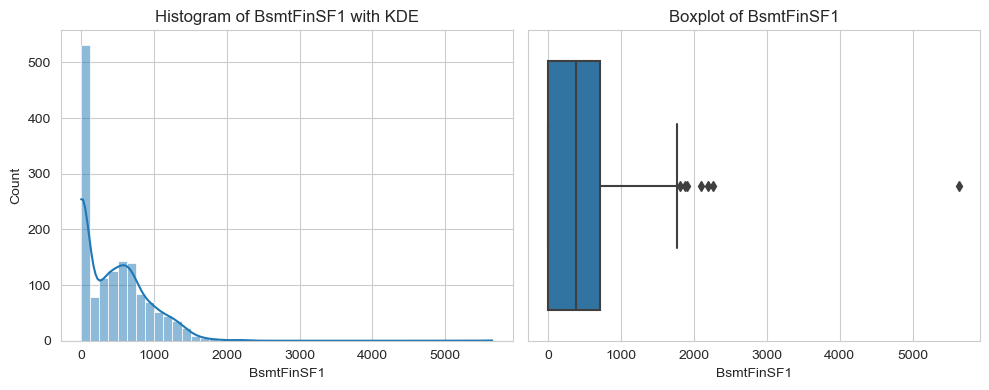

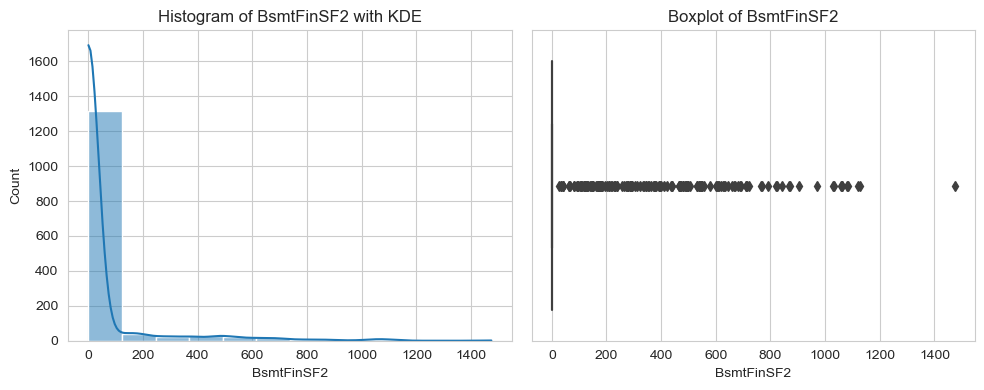

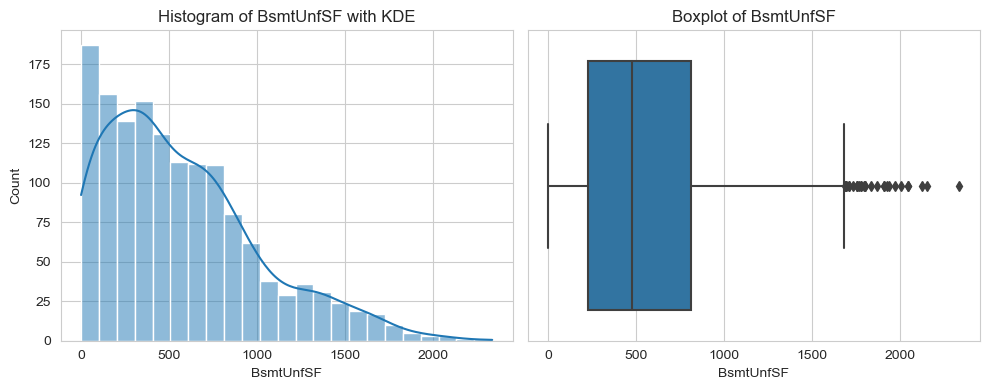

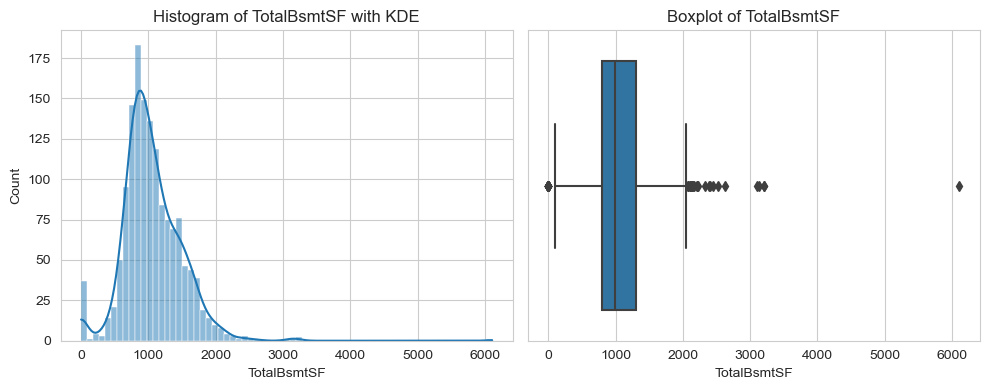

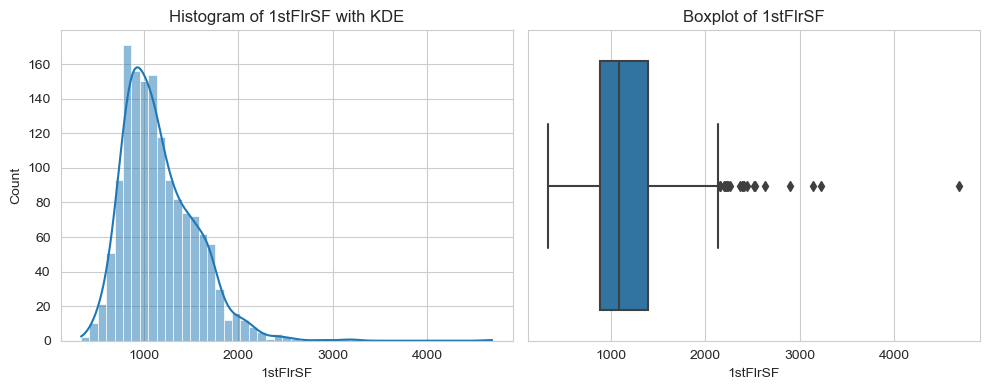

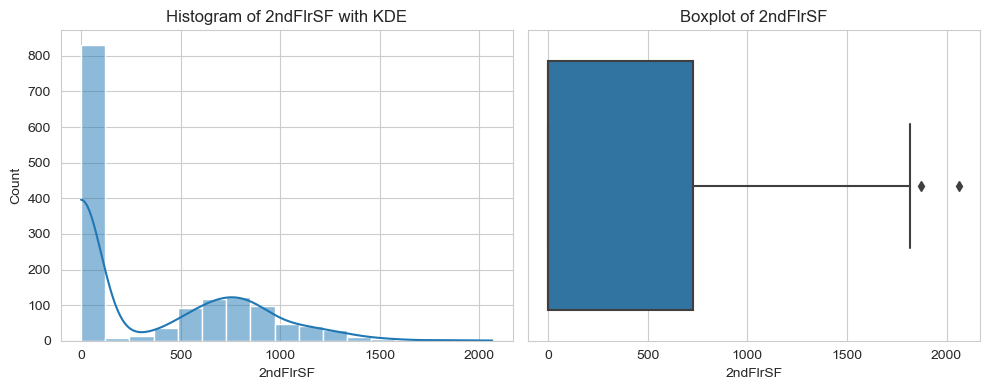

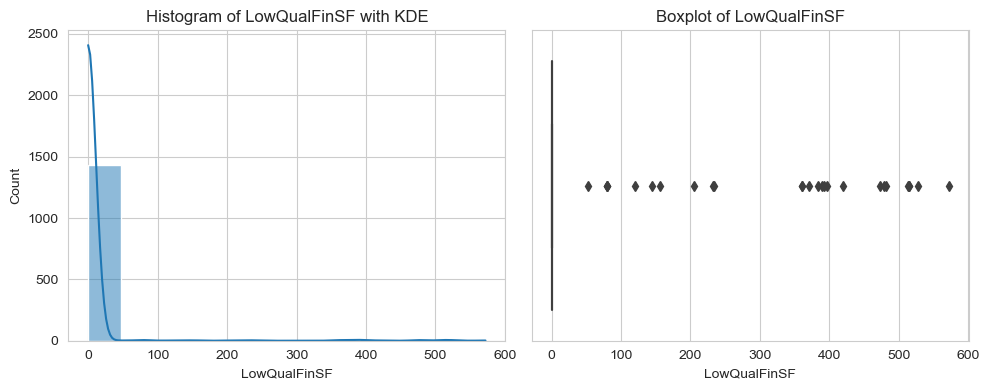

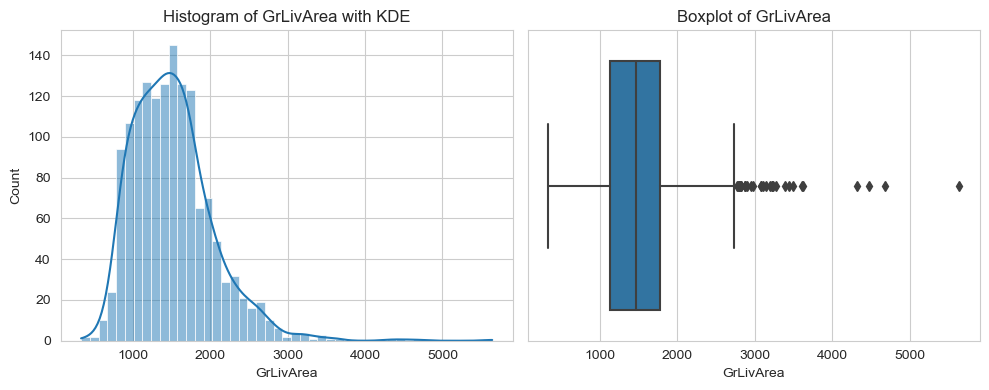

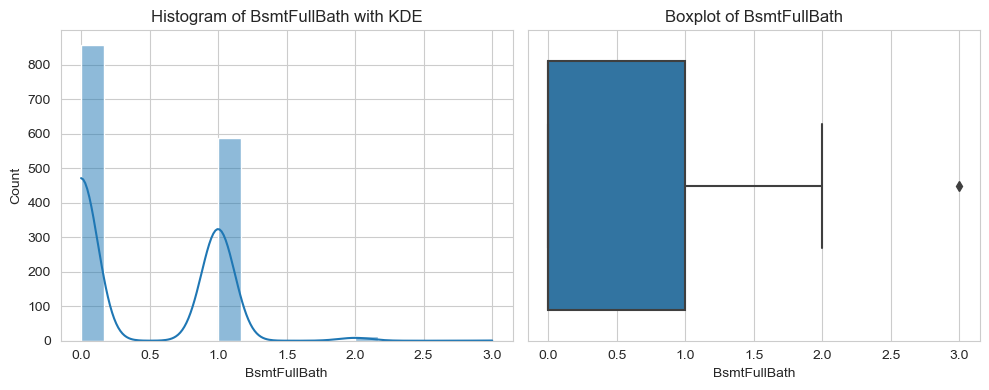

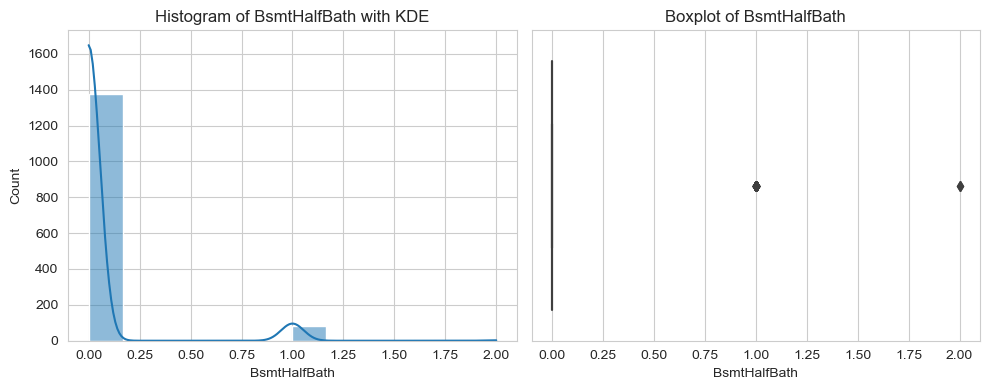

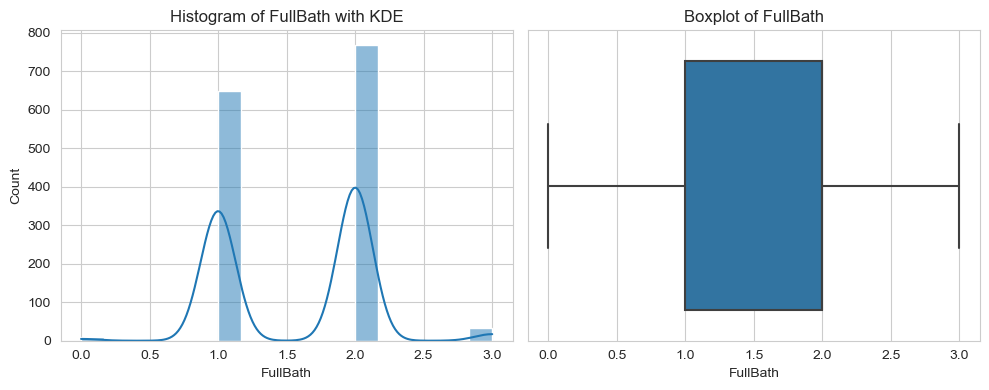

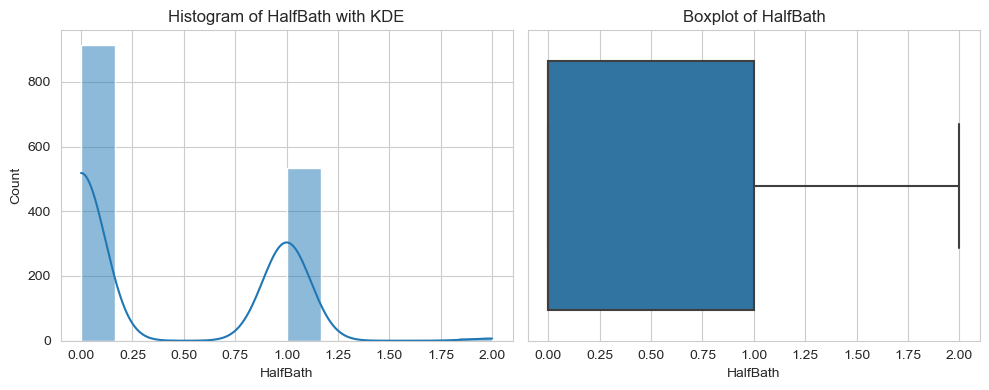

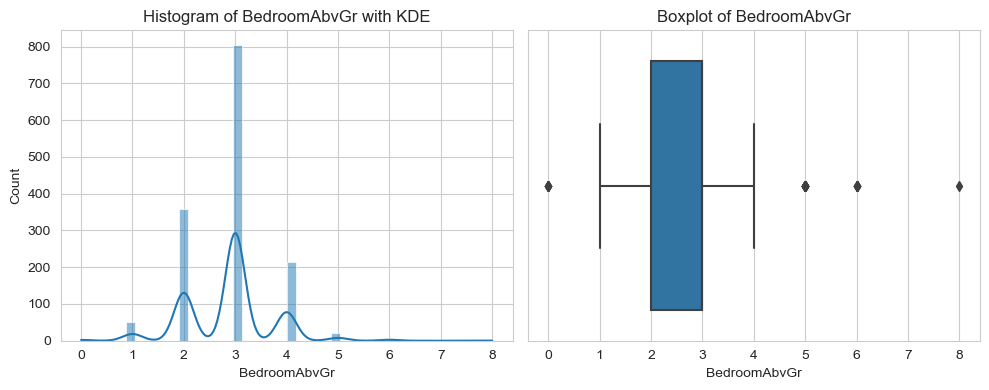

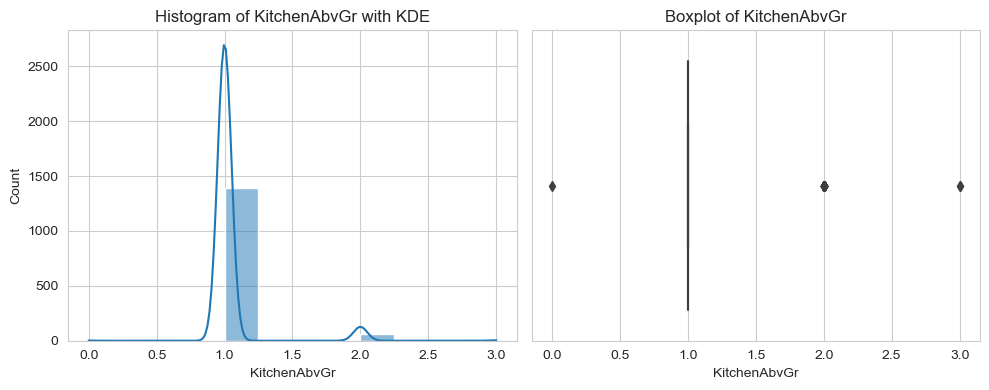

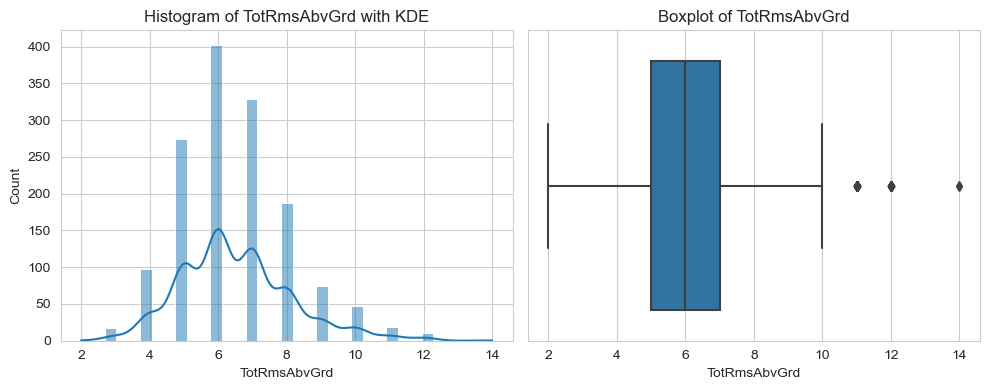

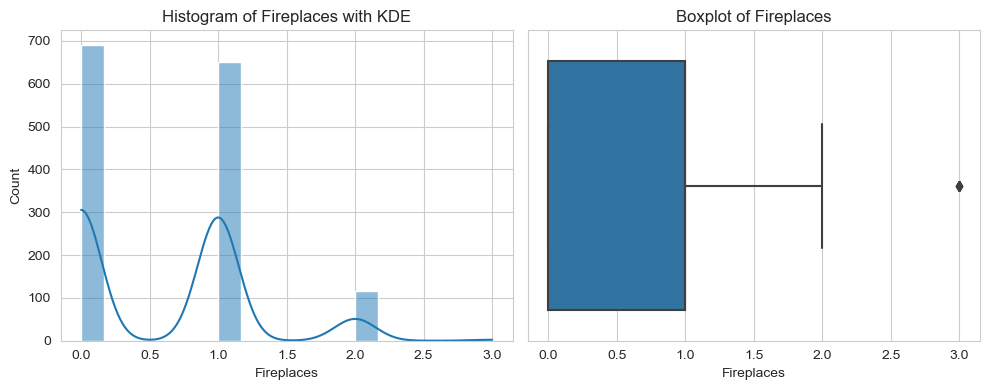

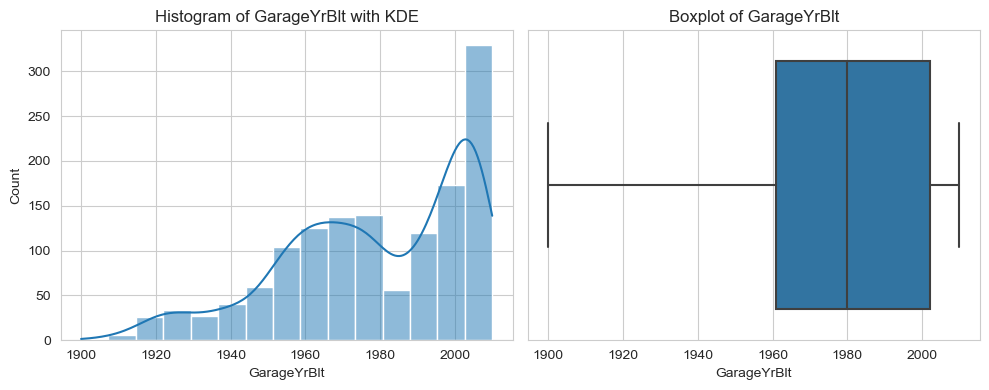

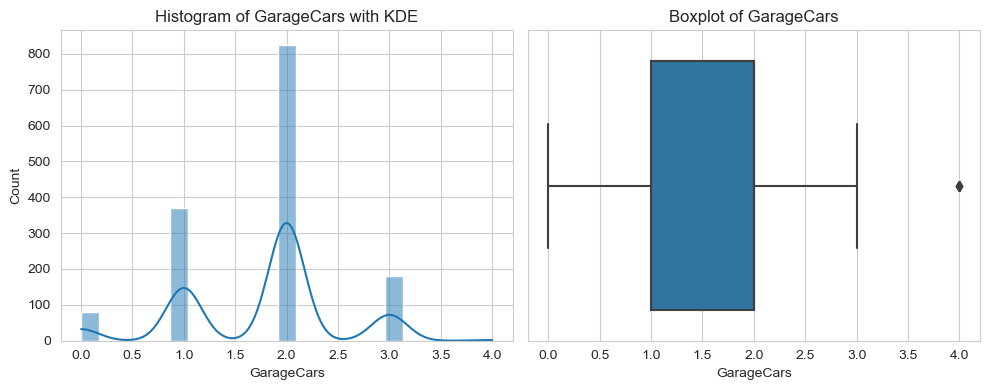

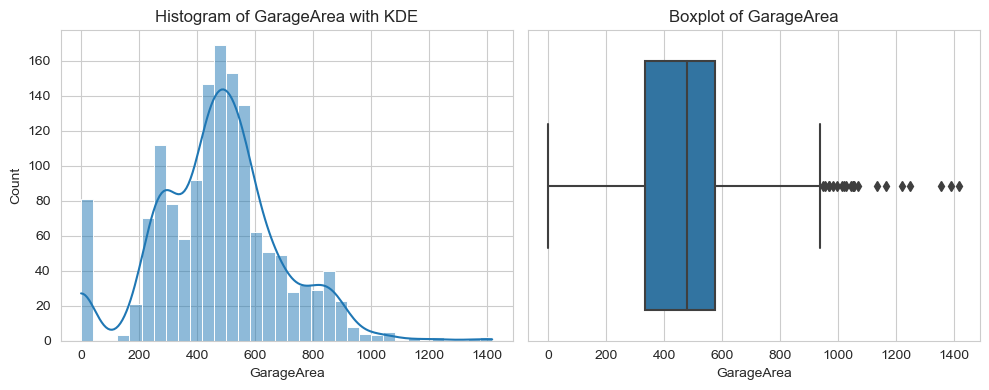

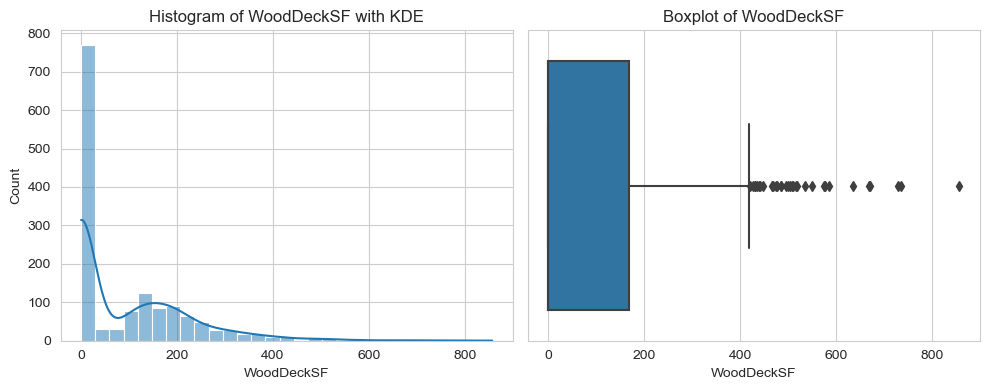

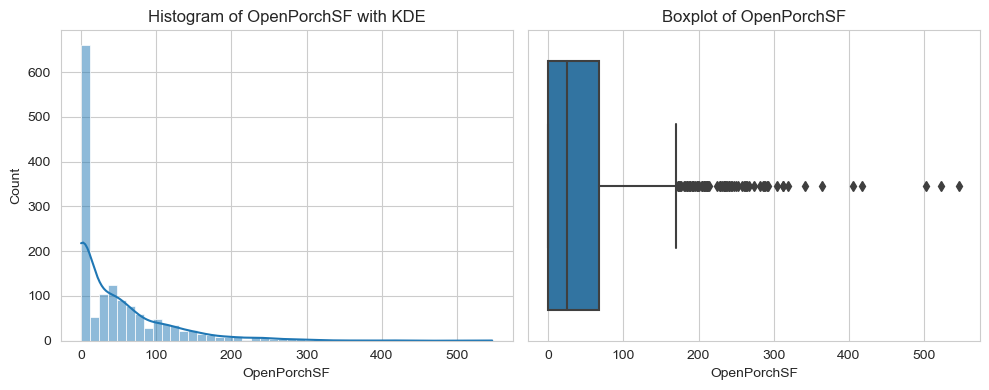

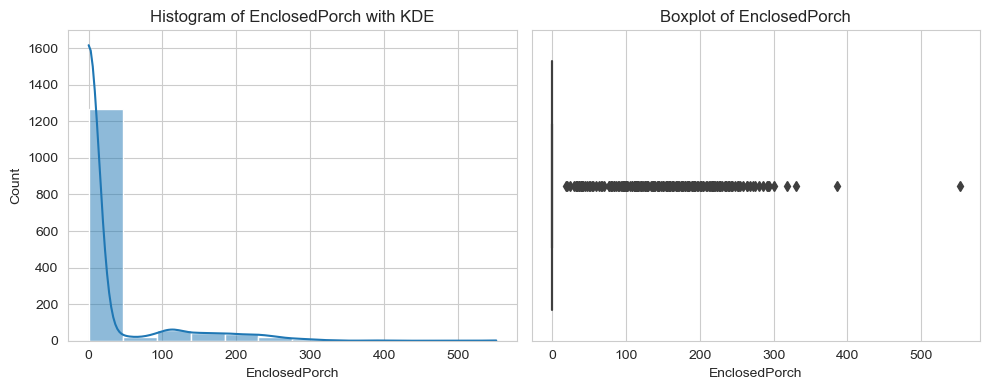

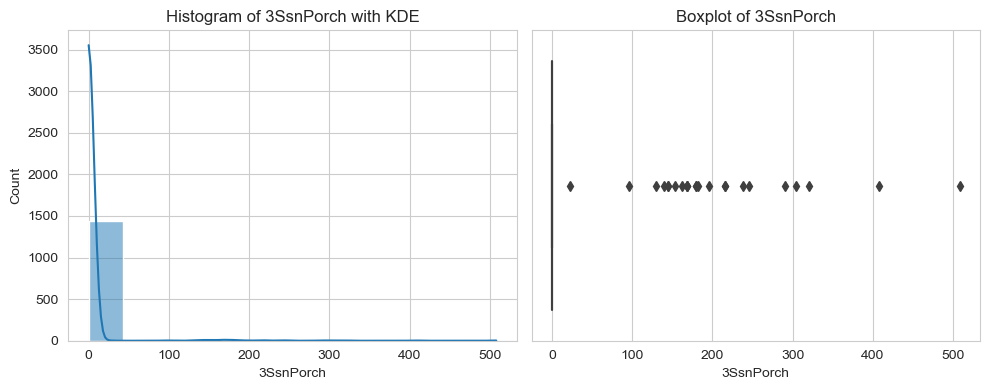

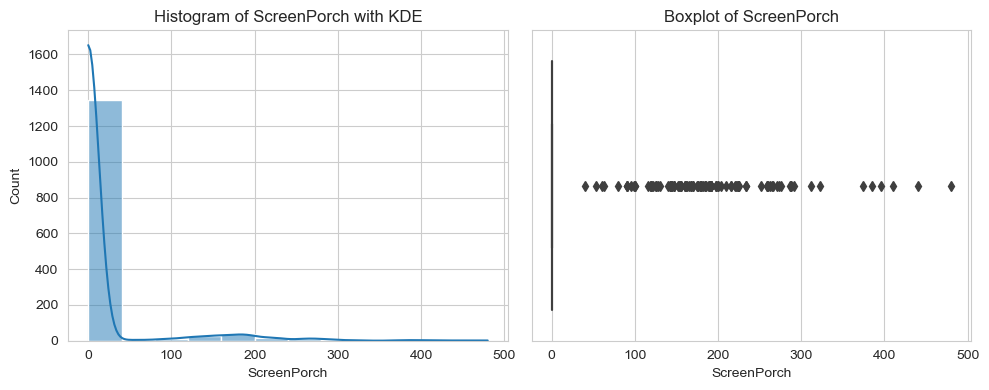

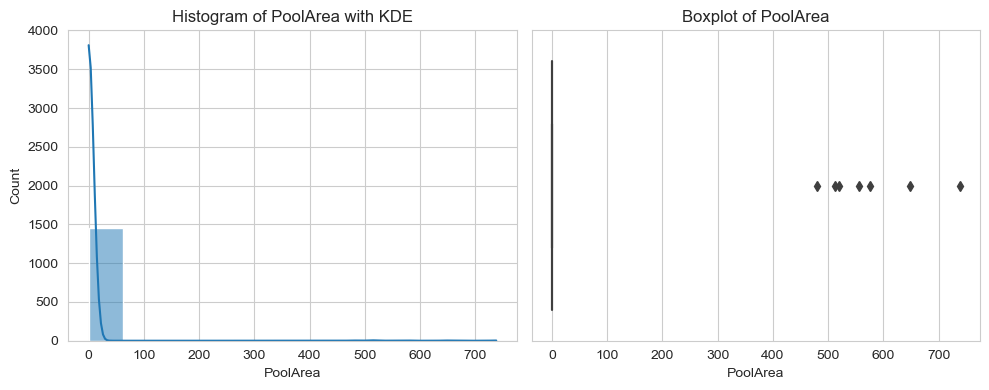

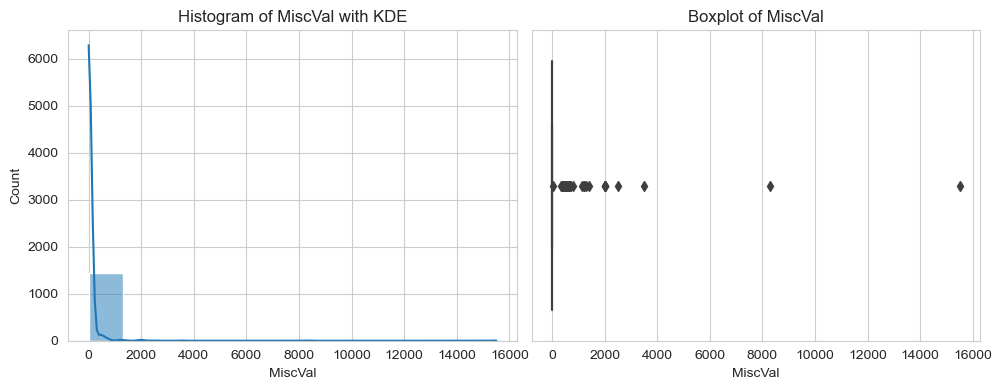

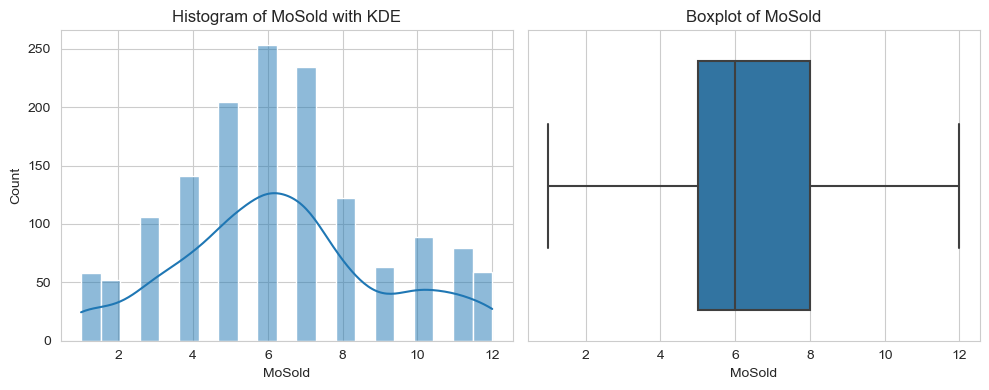

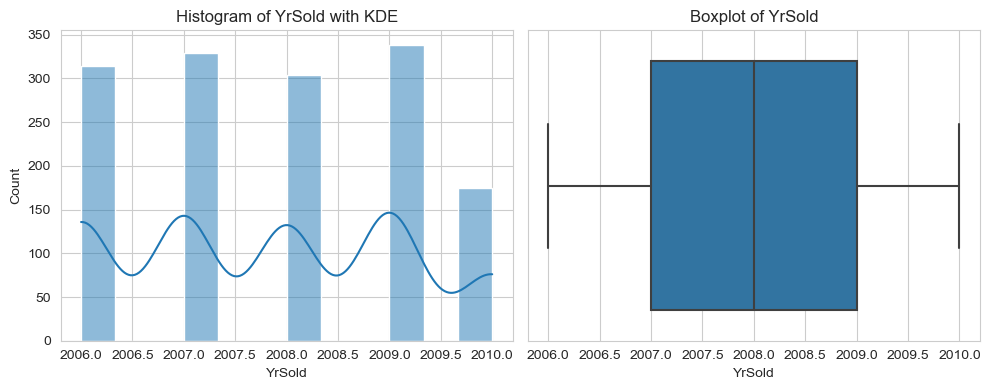

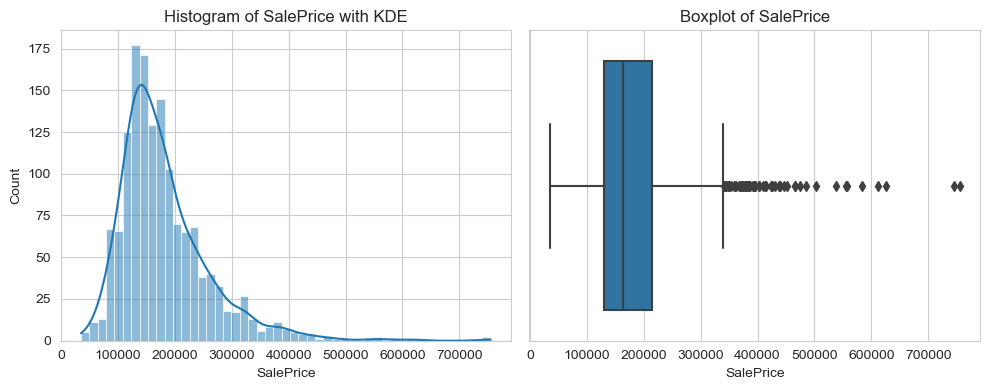

In [10]:
for feature in num_features:
    fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 4))

    ax0 = axes[0]
    ax0.set_title("Histogram of {} with KDE".format(feature))
    sns.histplot(data=df, x=feature, kde=True, ax=ax0)
    
    ax1 = axes[1]
    ax1.set_title("Boxplot of {}".format(feature))
    sns.boxplot(data=df, x=feature, ax=ax1)

    plt.tight_layout()
    plt.show()

- Looking at the chart, we see that the data set does not seem to be very good because the data distribution is not normal due to many null values ​​and outliers
- Most of the fields are ordered to the side because the value is quite high and there are fields whose columns have a value of 0 for many reasons because there are too many null values.

### SalePrice Feature Analysis
Let's Explore the target feature i.e SalesPrice.

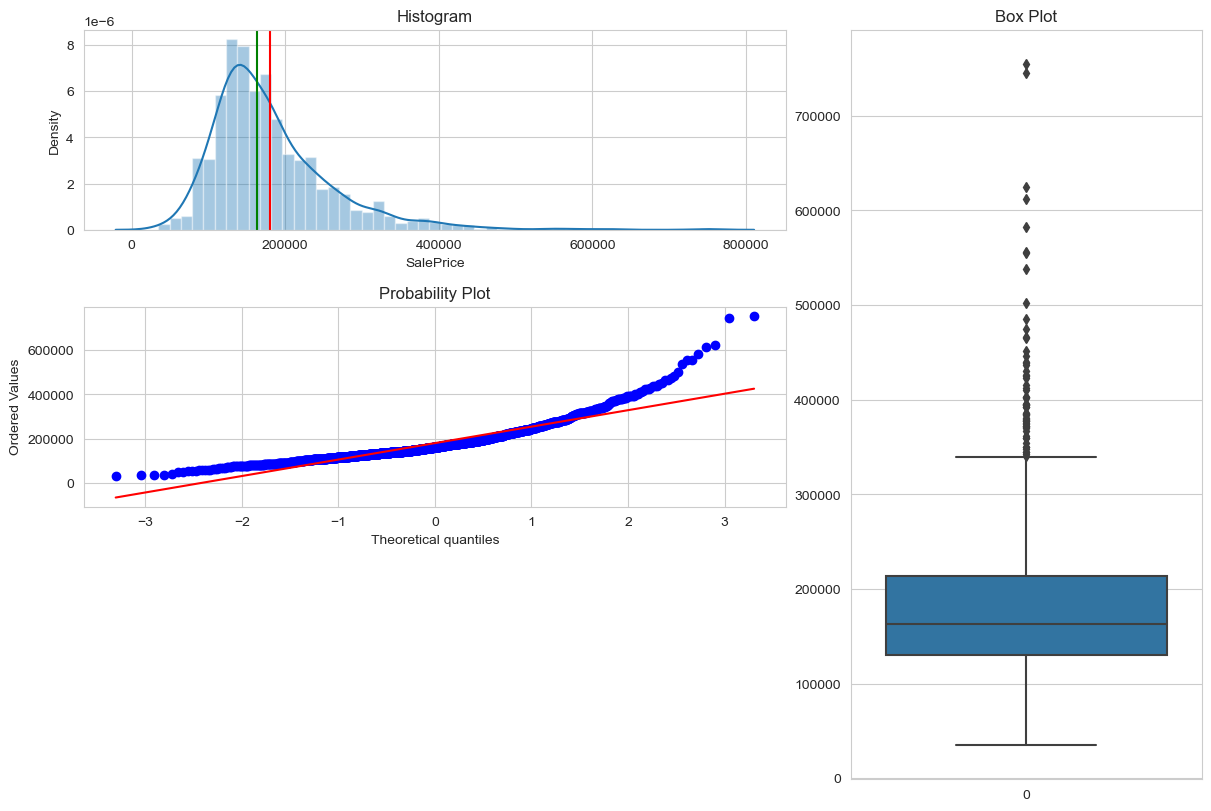

In [11]:
def three_chart_plot(df, feature):
    fig = plt.figure(constrained_layout = True, figsize = (12, 8))
    grid = gridspec.GridSpec(ncols = 3, nrows = 3, figure = fig)
    
    ax1 = fig.add_subplot(grid[0, :2])
    ax1.set_title('Histogram')
    
    sns.distplot(df.loc[:, feature], norm_hist = True, ax = ax1)
    plt.axvline(x = df[feature].mean(), c = 'red')
    plt.axvline(x = df[feature].median(), c = 'green')
    
    ax2 = fig.add_subplot(grid[1, :2])
    ax2.set_title('QQ_plot')
    stats.probplot(df.loc[:,feature], plot = ax2)

    ## Customizing the Box Plot. 
    ax3 = fig.add_subplot(grid[:, 2])
    ## Set title. 
    ax3.set_title('Box Plot')
    sns.boxplot(df.loc[:,feature], orient = 'v', ax = ax3 )
    
three_chart_plot(df, 'SalePrice')

**Red line in histogram indicates the mean of the SalePrice and the Green line indicates the median**
- From the above plots, we can observe that the Sales Price is not normally distributed. From the boxplot we can observe that the dataset have a number of outliers.

- For the probability plot, the red line represents those points which would have been plotted for y-axis points **if those were normally distributed**. But the blue points represents the actual scenario. We can see that there is a lot of deviation on the both the ends i.e on the top right and bottom left.

In [12]:
from scipy.stats import skew
print("Skewness of the SalesPrice is", df['SalePrice'].skew())

Skewness of the SalesPrice is 1.8828757597682129


Skewness refers to the amount of asymmetry in the given feature or in other words amount of distortions from the normal distribution. 

Here we can observe that the value of skewness is quite high which means that there is a large amount of asymmetry. 

The peak of the histogram represents the mode i.e the price for which maximum number of houses were sold.

What kind of skewness is present in the given case?

As the mean of the feature is greater than the median which is greater than the mode and the line is flat towards the right in the histogram, the given feature is **Positively Skewed**. Most of the houses were sold less than the average price.

### NUll Values

- There is an amazing library called missingno which helps us to visualize the number of Null values present in each feature.

<Axes: >

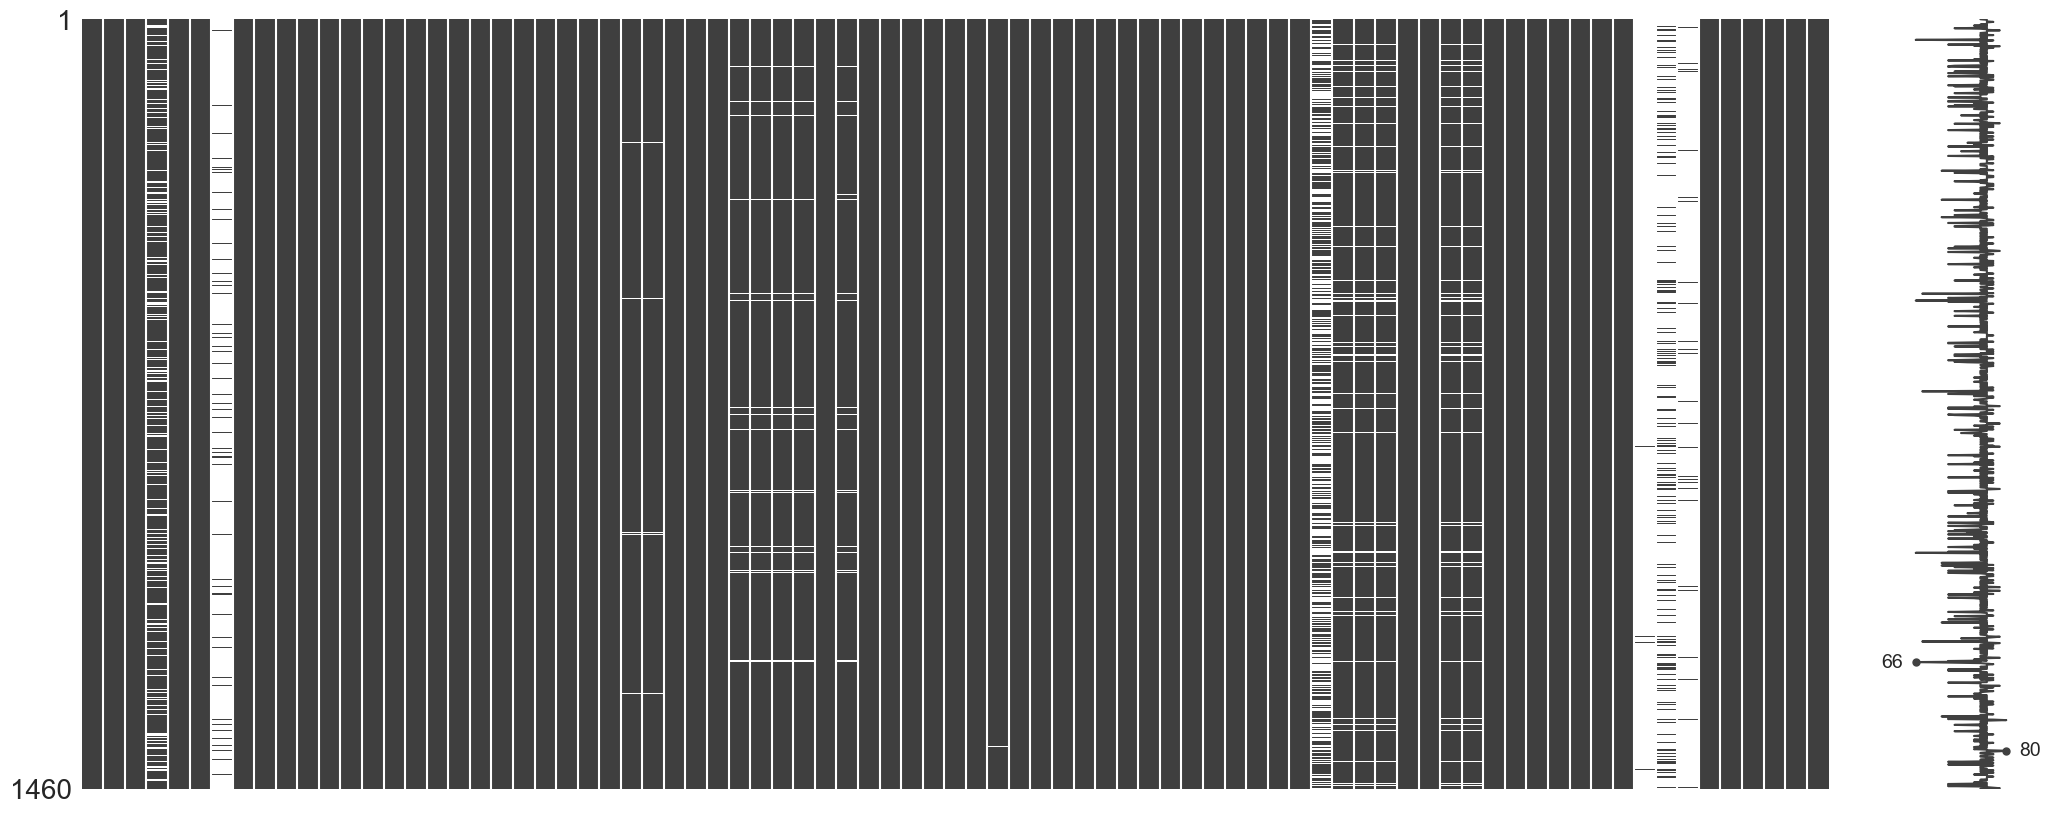

In [13]:
import missingno as msno
%matplotlib inline
msno.matrix(train)

<Axes: >

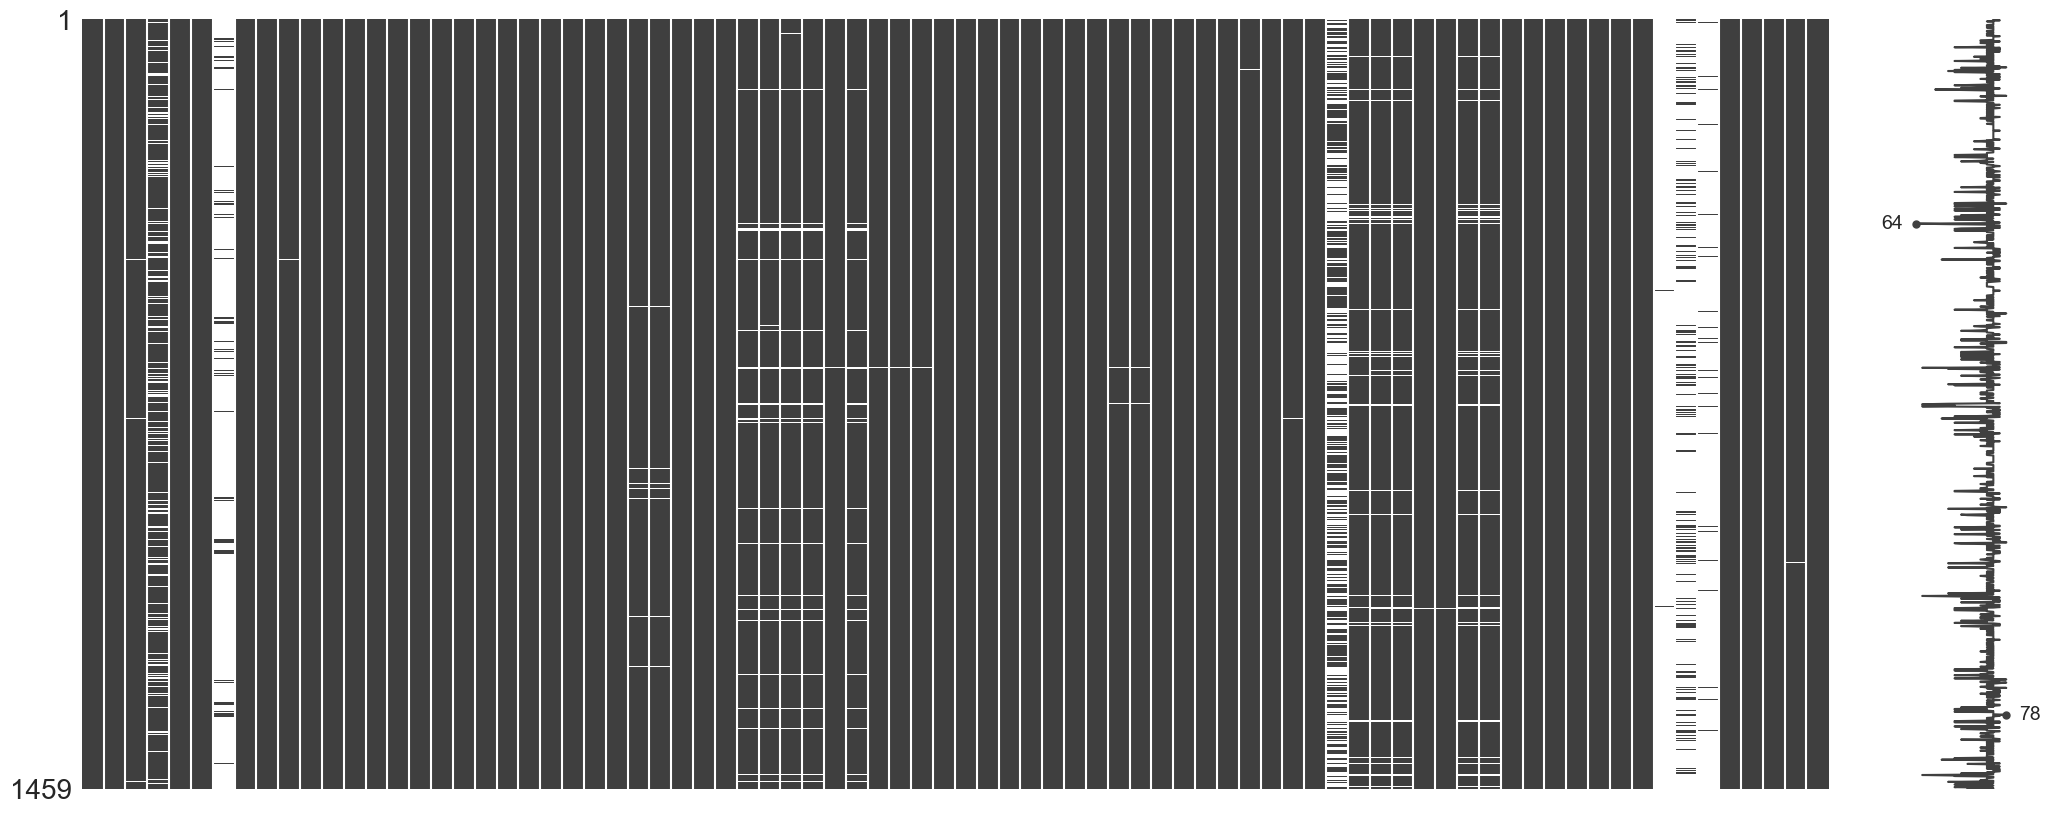

In [14]:
msno.matrix(test)

According to the data description, when a feature has a NaN value, it indicates that the corresponding attribute is not present in that particular house. So we will address it appropriately by filling in the missing values..

In [15]:
def null_table(data):
    """
    A function which returns the number and percentage of null values in the given dataset.
    """
    indices = data.isnull().sum().index
    values = data.isnull().sum().values
    percentages = []
    for i in indices:
        percentages.append((data[i].isnull().sum() / data[i].shape[0]) * 100)
    d = {'Columns' : indices, 'Count of Null Values' :
          values, 'Approximate Percentage of Null Values' : percentages}    
    # data = dict(zip(indices, percentages))
    null_frame = pd.DataFrame(data = d)
    return null_frame

In [16]:
null_frame_train = null_table(df)
null_frame_train.sort_values(by = 'Approximate Percentage of Null Values').tail(10)

,Columns,Count of Null Values,Approximate Percentage of Null Values
60,GarageFinish,81,5.547945
59,GarageYrBlt,81,5.547945
58,GarageType,81,5.547945
64,GarageCond,81,5.547945
3,LotFrontage,259,17.739726
57,FireplaceQu,690,47.260274
73,Fence,1179,80.753425
6,Alley,1369,93.767123
74,MiscFeature,1406,96.301370
72,PoolQC,1453,99.520548


We must observe here that **NA has a different meaning**. Here we can not impute or remove those rows having NA. For example if one of the values for Alley is NA, it means that home has no Alley or if the value of GarageType is NA it means that particular home has no Garage. That's why we need to take into account these values as it can affect the final prices of the house.

Let's combine both the train and test dataset and analyze the null values

In [17]:
na = train.shape[0]
nb = test.shape[0]
y_train = train['SalePrice'].to_frame()
# Combine train and test sets
total = pd.concat((train, test), sort = False).reset_index(drop = True)
# Drop the target "SalePrice" and Id columns
total.drop(['SalePrice'], axis = 1, inplace = True)
print(f"Total size is {total.shape}")
total.sample(10)

Total size is (2919, 80)


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
644,645,20,FV,85.0,9187,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,10,2009,New,Partial
1776,1777,30,RL,80.0,8480,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,8,2009,WD,Normal
200,201,20,RM,80.0,8546,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,3,2010,WD,Normal
1687,1688,60,RL,62.0,7984,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,9,2009,WD,Normal
1794,1795,20,RL,90.0,10454,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,4,2009,WD,Normal
1523,1524,20,RL,60.0,10950,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,5,2010,WD,Normal
875,876,60,FV,75.0,9000,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,8,2007,New,Partial
143,144,20,RL,78.0,10335,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2009,WD,Normal
26,27,20,RL,60.0,7200,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,5,2010,WD,Normal
2790,2791,20,RM,65.0,9750,Pave,Grvl,Reg,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,4500,7,2006,WD,Normal


In [18]:
def msv_1(data, thresh = 20, color = 'black', edgecolor = 'black', height = 3, width = 15):
    
    plt.figure(figsize = (width, height))
    percentage = (data.isnull().mean()) * 100
    percentage.sort_values(ascending = False).plot.bar(color = color, edgecolor = edgecolor)
    plt.axhline(y = thresh, color = 'r', linestyle = '-')
    
    plt.title('Missing values percentage per column', fontsize=20, weight='bold' )
    
    plt.text(len(data.isnull().sum()/len(data))/1.7, thresh+12.5, f'Columns with more than {thresh}% missing values', fontsize=12, color='crimson',
         ha='left' ,va='top')
    plt.text(len(data.isnull().sum()/len(data))/1.7, thresh - 5, f'Columns with less than {thresh}% missing values', fontsize=12, color='green',
         ha='left' ,va='top')
    plt.xlabel('Columns', size=15, weight='bold')
    plt.ylabel('Missing values percentage')
    plt.yticks(weight ='bold')
    
    return plt.show()

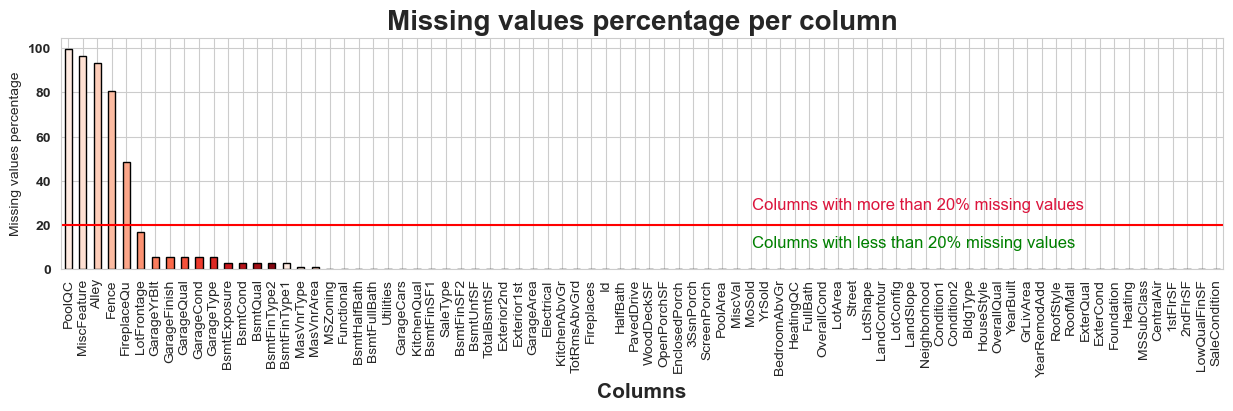

In [19]:
msv_1(total, 20, color=sns.color_palette('Reds',15))

There are 5 columns having more than 20 percent null values. We will deal with these values later.

### Numerical and Categorical Variables

#### Exploring Numerical Variables

In [20]:
print("Number of categorical features are: ", len(num_features))
print("Number of numerical features are: ", len(cat_features))

Number of categorical features are:  38
Number of numerical features are:  43


Before moving forward let's see the correlation of the numerical features with the target variable

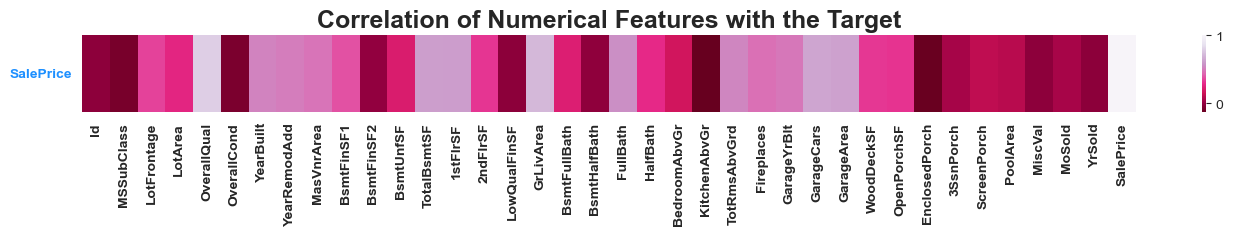

In [21]:
num = df.select_dtypes(exclude = 'object')
corr_num = num.corr()

f, ax = plt.subplots(figsize = (17, 1))

sns.heatmap(corr_num.sort_values(by = ['SalePrice'], ascending = False).head(1), cmap='PuRd_r')

plt.title('Correlation of Numerical Features with the Target', weight = 'bold', fontsize = 18)
plt.xticks(weight='bold')
plt.yticks(weight='bold', color='dodgerblue', rotation=0)

plt.show()

In [22]:
correlation = df.corr()['SalePrice'].sort_values(ascending = False).to_frame().head(10)

cmap = sns.light_palette("cyan", as_cmap = True)

s = correlation.style.background_gradient(cmap = cmap)

s

,SalePrice
SalePrice,1.000000
OverallQual,0.790982
GrLivArea,0.708624
GarageCars,0.640409
GarageArea,0.623431
TotalBsmtSF,0.613581
1stFlrSF,0.605852
FullBath,0.560664
TotRmsAbvGrd,0.533723
YearBuilt,0.522897


From the above table, we can conclude that better the overall quality of the house, more will be the price of the house which is also true in real life. Same is true for 
the living area i.e as the area increases, more will be the Sale Price.

Let's plot a graph to examine the relationship between GrLivArea and the SalePrice

In [23]:
def plot_scatter(data,x,y,xticks,yticks,tittle):
    plt.figure(figsize = ((15, 6)))
    plt.scatter(x = x, y = y, data = data, color='crimson', alpha=0.4)
    plt.title(tittle, weight = 'bold', fontsize = 10)
    plt.xlabel(xticks, weight = 'bold')
    plt.ylabel(yticks, weight = 'bold')
    plt.show()

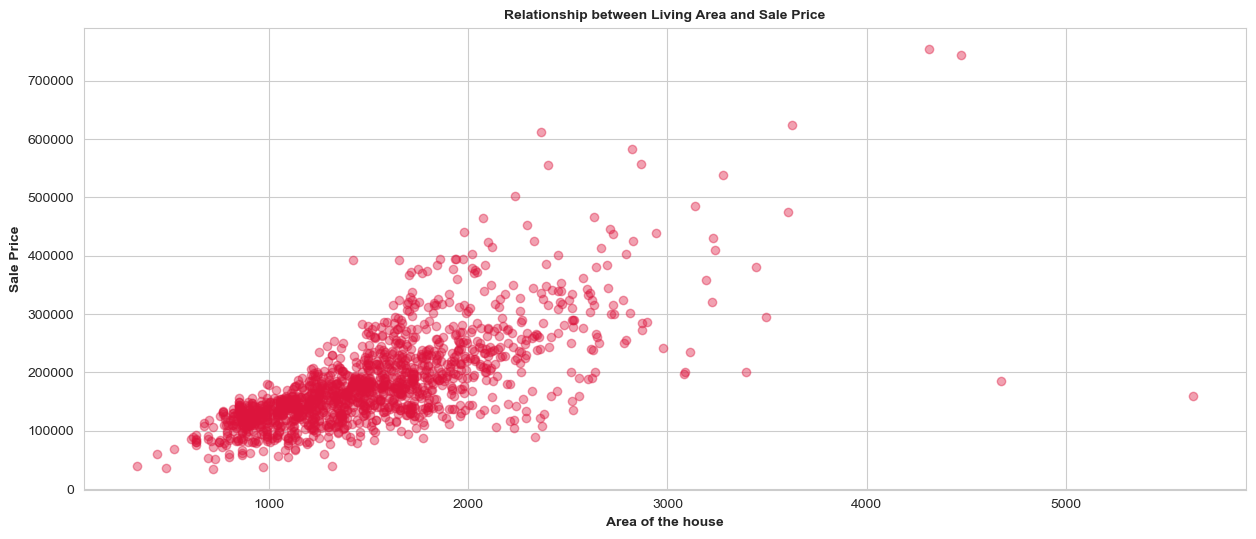

In [24]:
plot_scatter(df,'GrLivArea','SalePrice','Area of the house','Sale Price'
             ,'Relationship between Living Area and Sale Price')

We can observe that there is almost **a linear relationship between Living Area and the Sale Price**. If the area is huge then price should also have also been high but the two rightmost points suggest something else. **These two points are outliers**. We will drop both of them below.

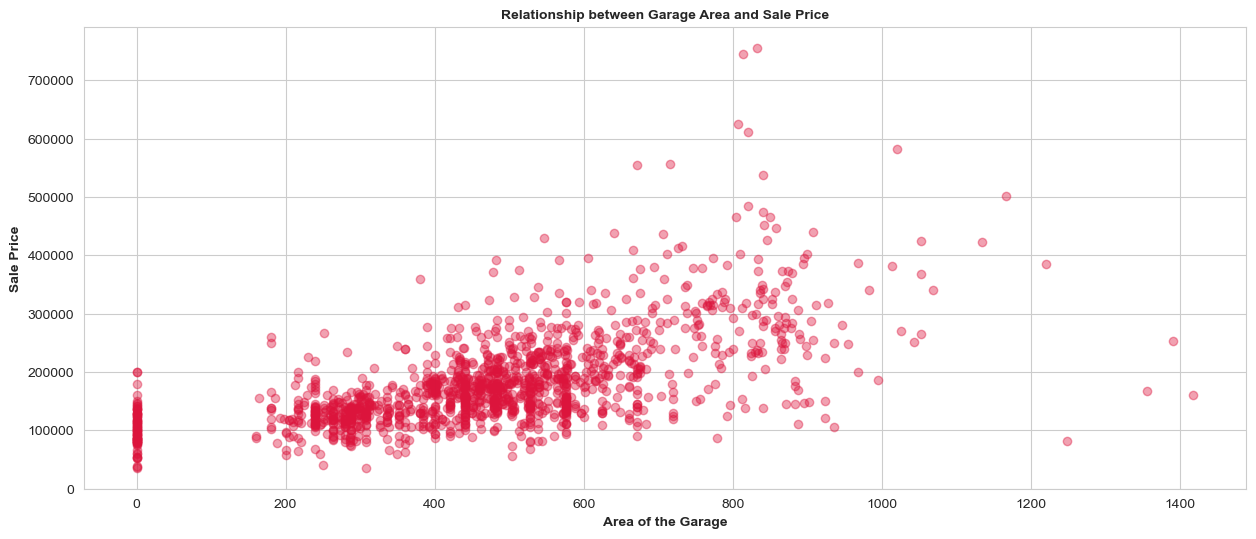

In [25]:
plot_scatter(df,'GarageArea','SalePrice','Area of the Garage','Sale Price','Relationship between Garage Area and Sale Price')
# Relationship between Garage Area and Sale Price

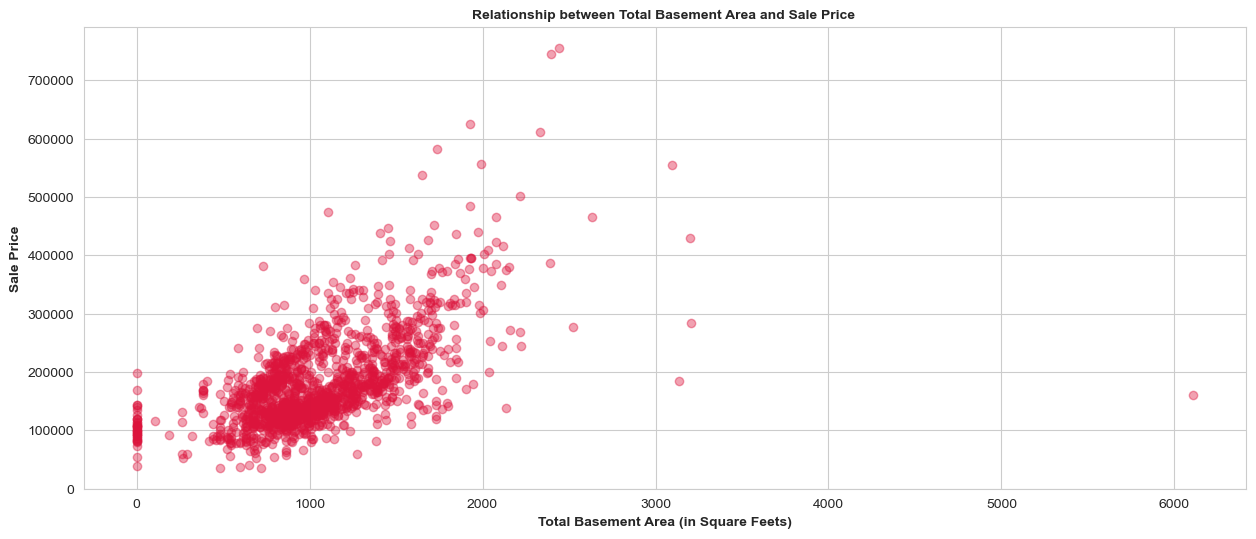

In [26]:
# Relationship between Total Basement Area and Sale Price 
plot_scatter(df,'TotalBsmtSF','SalePrice','Total Basement Area (in Square Feets)','Sale Price','Relationship between Total Basement Area and Sale Price ')

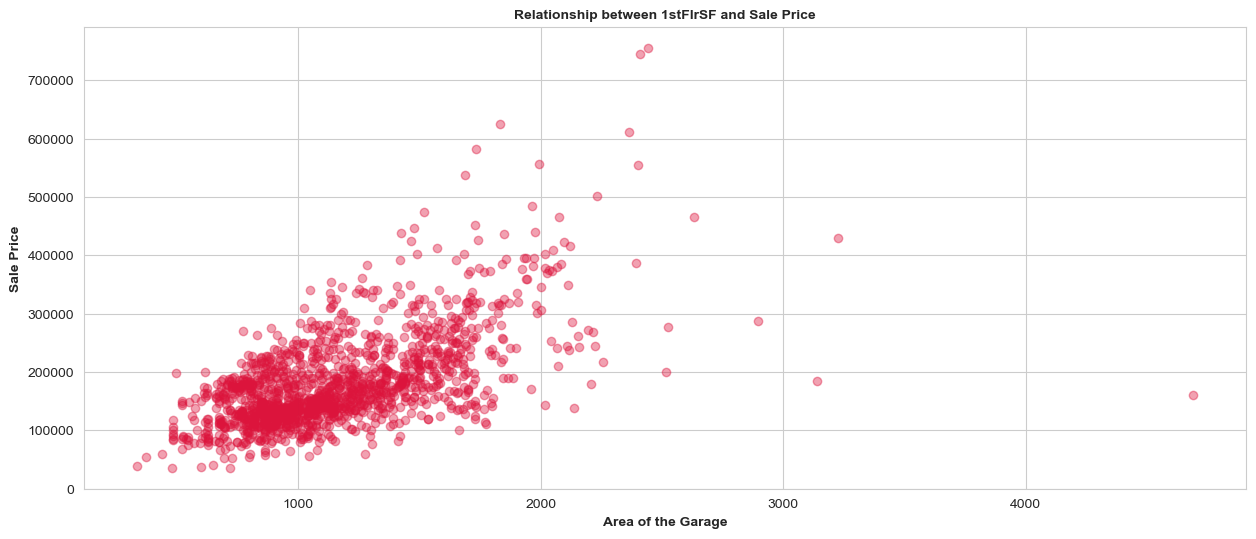

In [27]:
# Relationship between 1stFlrSF and Sale Price
plot_scatter(df,'1stFlrSF','SalePrice','Area of the Garage','Sale Price','Relationship between 1stFlrSF and Sale Price')

Before we move forward we need to understand the assumptions of linear regression:
* Linearity
* Homoscedasticity
* No or little Multicollinearity
* Independence of Error

Since we fit a linear model, we assume that the relationship is linear, and the errors, or residuals, are pure random fluctuations around the true line. We expect that the variability in the dependent variable doesn't increase as the value of the independent increases, which is the assumptions of equal variance, also known as Homoscedasticity. We also assume that the observations are independent of one another(No Multicollinearity), and a correlation between sequential observations or auto-correlation is not there.

Now, these assumptions are prone to happen altogether. In other words, if we see one of these assumptions in the dataset, it's more likely that we may come across with others mentioned above. Therefore, we can find and fix various assumptions with a few unique techniques.

In order to discover the linearity let's plot scatter plots for GrLivArea and MasVnrArea

<Axes: xlabel='MasVnrArea', ylabel='SalePrice'>

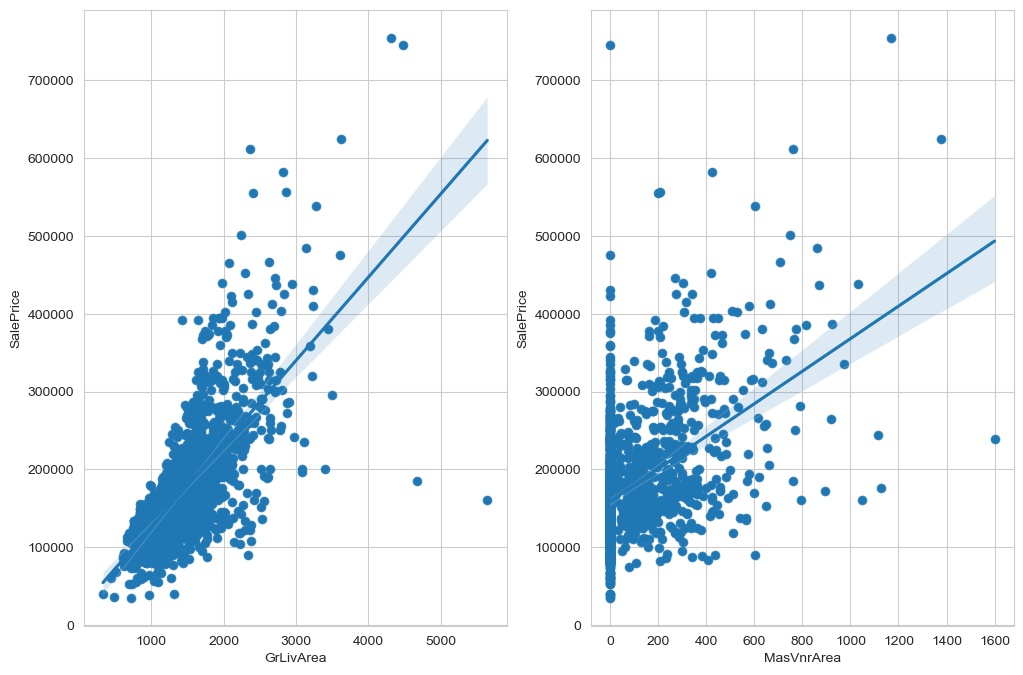

In [28]:
## Scatter plotting for SalePrice and GrLivArea.
fig, (ax1, ax2) = plt.subplots(figsize = (12, 8), ncols = 2,sharey = False)
 
sns.scatterplot(x = df['GrLivArea'], y = df['SalePrice'],  ax = ax1)
## Putting a regression line. 
sns.regplot(x = df['GrLivArea'], y = df['SalePrice'], ax = ax1)

sns.scatterplot(x = df['MasVnrArea'],y = df['SalePrice'], ax = ax2)
## regression line for MasVnrArea and SalePrice. 
sns.regplot(x = df['MasVnrArea'], y = df['SalePrice'], ax=ax2)

We can observe that the relationship between Sales Price and GrLivArea is much more linear than the relationship between Sales Price and MasVnrArea.

Let's look at the residual plot for independent variable GrLivArea and our target variable SalePrice. 

A residual value is a measure of how much a regression line vertically misses a data point. Regression lines are the best fit of a set of data. You can think of the lines as averages; a few data points will fit the line and others will miss. A residual plot has the Residual Values on the vertical axis; the horizontal axis displays the independent variable.

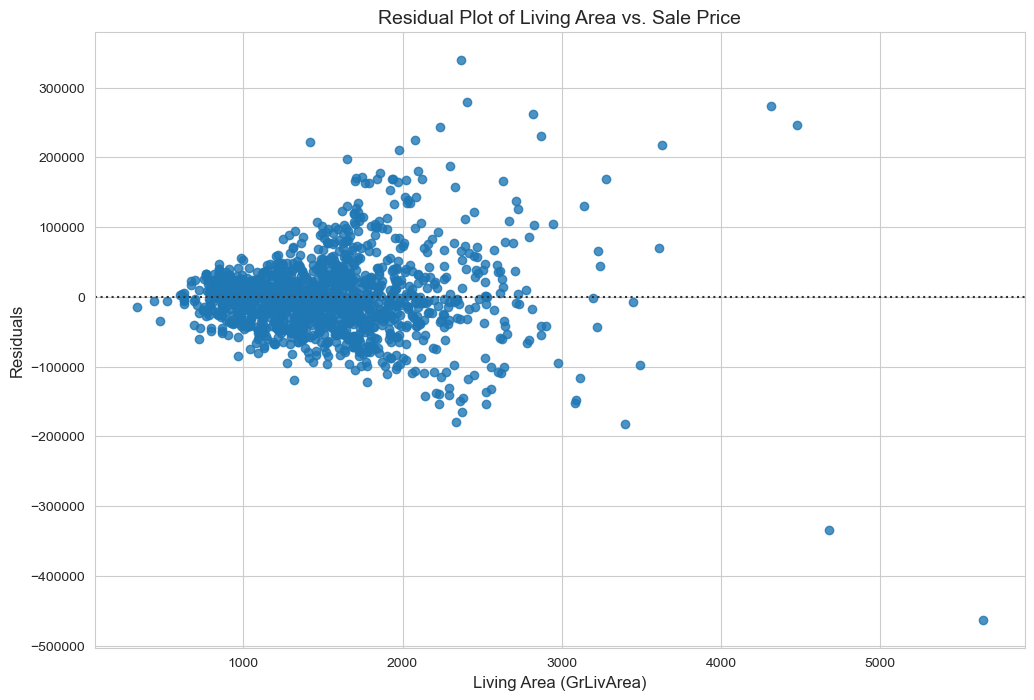

In [29]:
plt.figure(figsize=(12, 8))
sns.residplot(x=df['GrLivArea'], y=df['SalePrice'])
plt.title('Residual Plot of Living Area vs. Sale Price', fontsize=14)
plt.xlabel('Living Area (GrLivArea)', fontsize=12)
plt.ylabel('Residuals', fontsize=12)
plt.show()

Ideally, if the assumptions are met, the residuals will be randomly scattered around the centerline of zero with no apparent pattern. The residual will look like an unstructured cloud of points centered around zero. However, our residual plot is anything but an unstructured cloud of points. Even though it seems like there is a linear relationship between the response variable and predictor variable, the residual plot looks more like a funnel. 

The error plot shows that as GrLivArea value increases, the variance also increases, which is the characteristics known as Heteroscedasticity. The linear regression analysis requires the dependent variable to be multivariate normally distributed. A histogram, box plot, or a Q-Q-Plot can check if the target variable is normally distributed. 

Let's plot the three graphs again for the target feature.

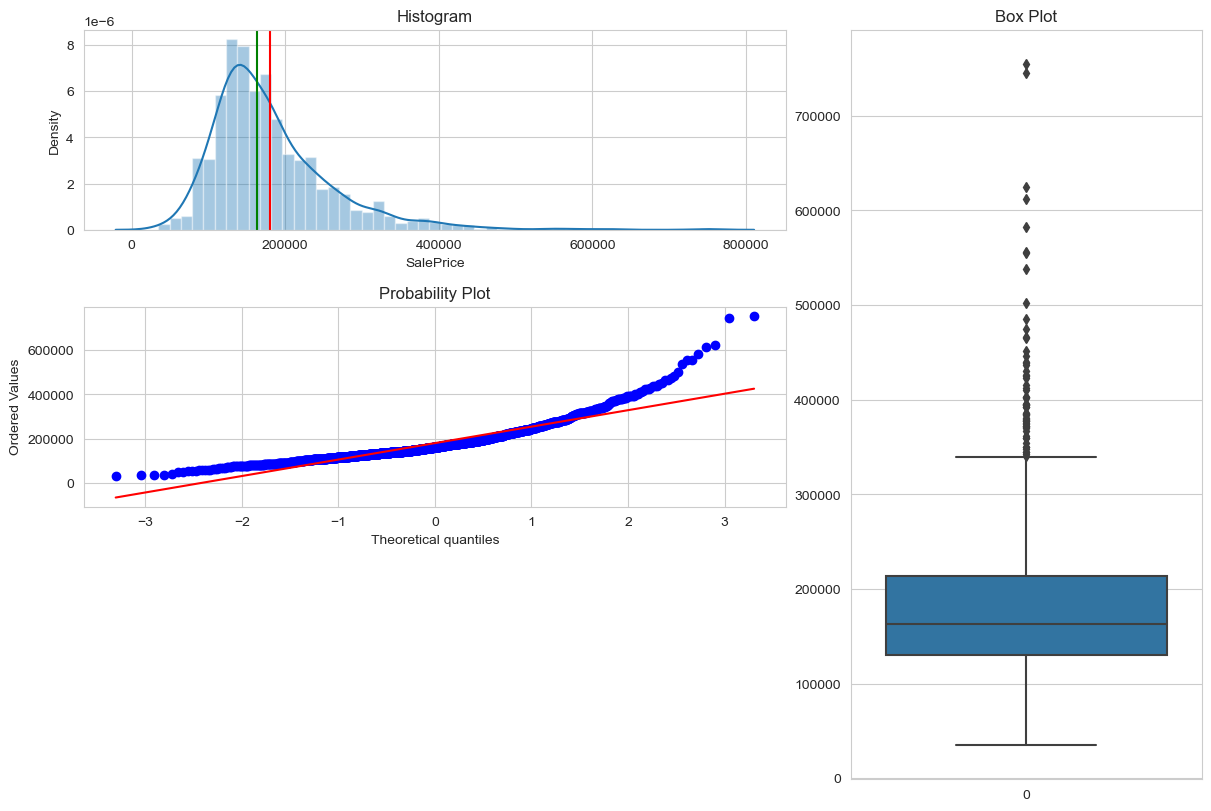

In [30]:
three_chart_plot(df, 'SalePrice')

Now let's make sure that the target variable follows a normal distribution. In order to make a feature follow normal distribution, we will perform log transformation.

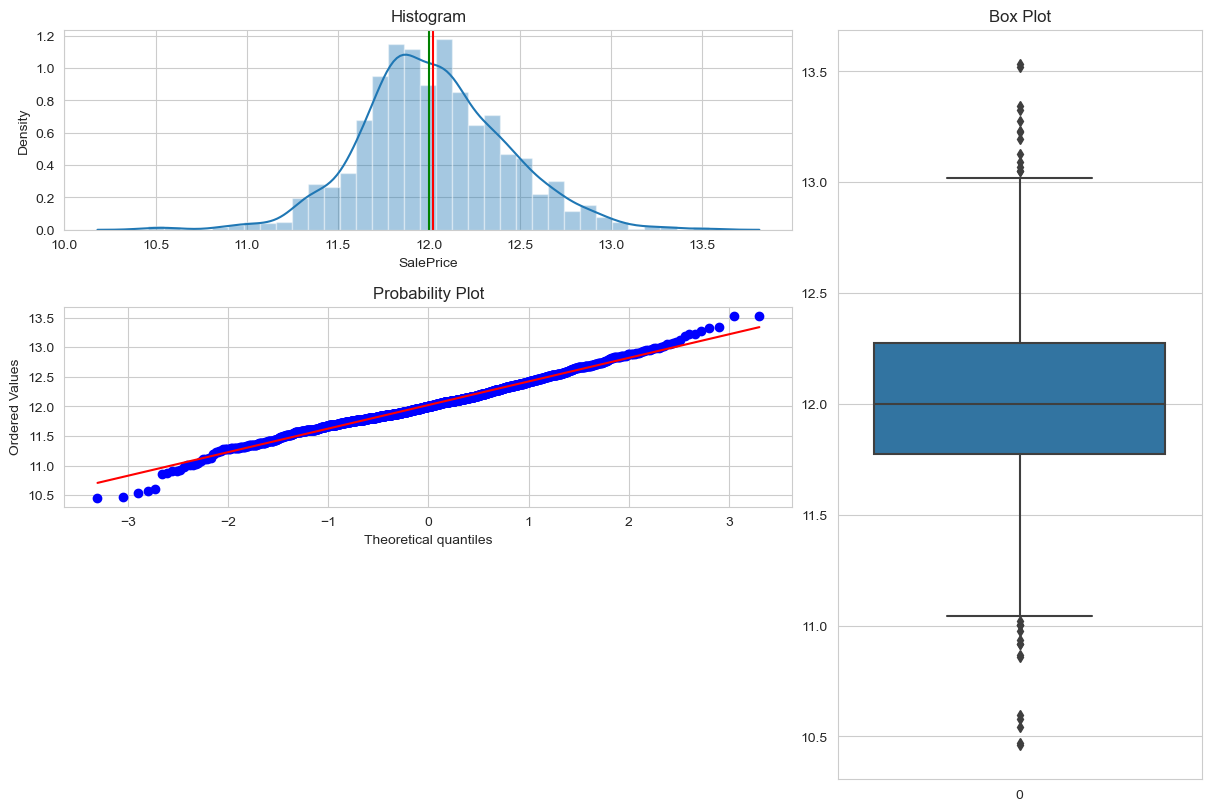

In [31]:
train["SalePrice"] = np.log1p(train["SalePrice"])
df = train
three_chart_plot(df, 'SalePrice')

In [32]:
df.shape

(1460, 81)

In [33]:
def remove_outliers_iqr(data, feature):
   
    Q1 = data[feature].quantile(0.25)
    Q3 = data[feature].quantile(0.75)
    IQR = Q3 - Q1
    
    lower_cutoff = Q1 - 1.5 * IQR
    upper_cutoff = Q3 + 1.5 * IQR
    
    filtered_data = data[(data[feature] >= lower_cutoff) & (data[feature] <= upper_cutoff)]
    
    return filtered_data

df_cleaned = remove_outliers_iqr(df, 'SalePrice')

print("Kích thước của DataFrame sau khi loại bỏ outlier:", df_cleaned.shape)

Kích thước của DataFrame sau khi loại bỏ outlier: (1432, 81)


We can observe that the SalesPrice feature now follows a normal distibution as the Histogram resembles bell-shape and the QQ-plot also overlaps with the red line. Let's again plot the scatter plot for GrLivArea and SalePrice to see whether Heteroscedasticity was removed.

Linear Regression indicates significant relationships between the dependent variable and the independent variable. It assumes that there is a linear relationship between the independent variables and the dependent variable but this is not always the case in real life. There are very less scenarios where this assumption holds true. Multiple Regression also suffers from multi-collinearity, auto-correlation, and heteroskedasticity.

The interpretation of the linear coefficient is that it represents the mean change in the dependent variable for 1 unit change in the independent variable when all the other independent variables are held constant.

Now suppose that there are two correlated independent variables (A and B) and we are aiming to find the right coefficient for these independent variables. When the coefficient for A is calculated, will that coefficient be accurate? No, it won’t be right because changes in A are associated with shifts in B, and as we have already discussed that all the other variables need to be held constant, B can’t be held as a constant because A and B are correlated. This is known as Multicollinearity and it is one of the disadvantages of Linear Regression.

In order to solve this problem, we use various regularization techniques (l1, l2 etc) or other kind of regression techniuques like Elastic Net Regression, Lasso and Ridge Regression which automatically takes care of multicollinearity.

Check this [blog](https://medium.com/gdg-vit/overcoming-the-drawbacks-of-linear-regression-497fffcdd2d8) for better understanding

<Figure size 1500x1000 with 0 Axes>

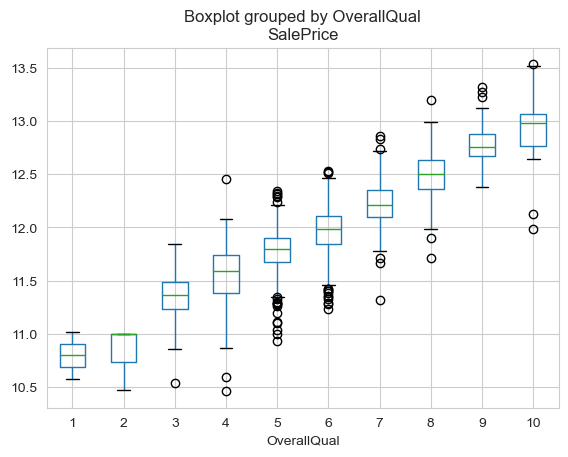

In [34]:
plt.figure(figsize = ((15, 10)))
df.boxplot(by = 'OverallQual', column = 'SalePrice')
plt.show()

As the quality increases, price of the houses also increase

####  Exploring Categorical Variables


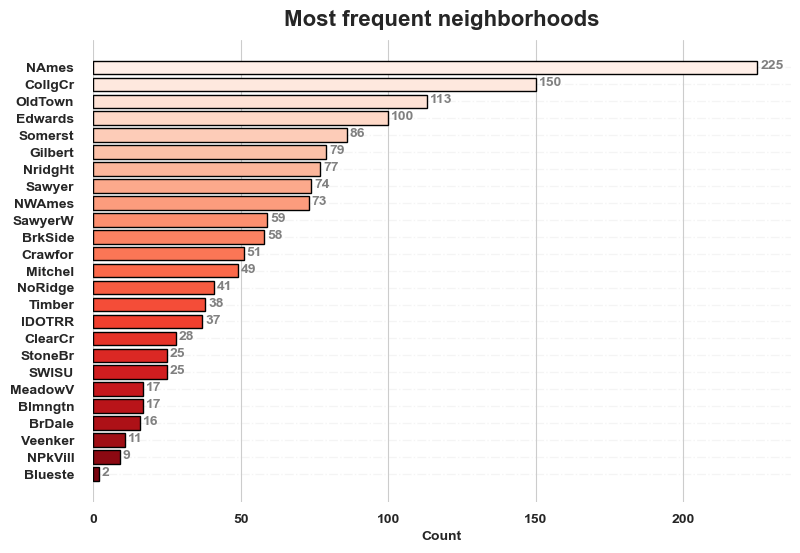

In [35]:
def horizontal_plot(data, column_name, color, plot_title):
    """
    A function that plots a horizontal bar graph for the given column name
    """
    fig, ax = plt.subplots(figsize=(9, 6))
    
    title_cnt = data[column_name].value_counts().sort_values(ascending=False).reset_index()

    mn = ax.barh(title_cnt.iloc[:, 0], title_cnt.iloc[:, 1], edgecolor='black', color=sns.color_palette(color, len(title_cnt)))

    for s in ['top', 'bottom', 'left', 'right']:
        ax.spines[s].set_visible(False)

    # Remove x,y Ticks
    ax.xaxis.set_ticks_position('none')
    ax.yaxis.set_ticks_position('none')

    # Add padding between axes and labels
    ax.xaxis.set_tick_params(pad=5)
    ax.yaxis.set_tick_params(pad=10)

    # Add y-axis gridlines
    ax.grid(axis='y', linestyle='-.', linewidth=1, alpha=0.2)

    # Show top values
    ax.invert_yaxis()

    ax.set_title(plot_title, weight='bold', loc='center', pad=10, fontsize=16)
    ax.set_xlabel('Count', weight='bold')

    for i in ax.patches:
        ax.text(i.get_width() + 1.0, i.get_y() + 0.5, str(round(i.get_width(), 2)),
                fontsize=10, fontweight='bold', color='grey')

    plt.yticks(weight='bold')
    plt.xticks(weight='bold')

    plt.show()

# Gọi hàm horizontal_plot
horizontal_plot(df, 'Neighborhood', 'Reds', 'Most frequent neighborhoods')


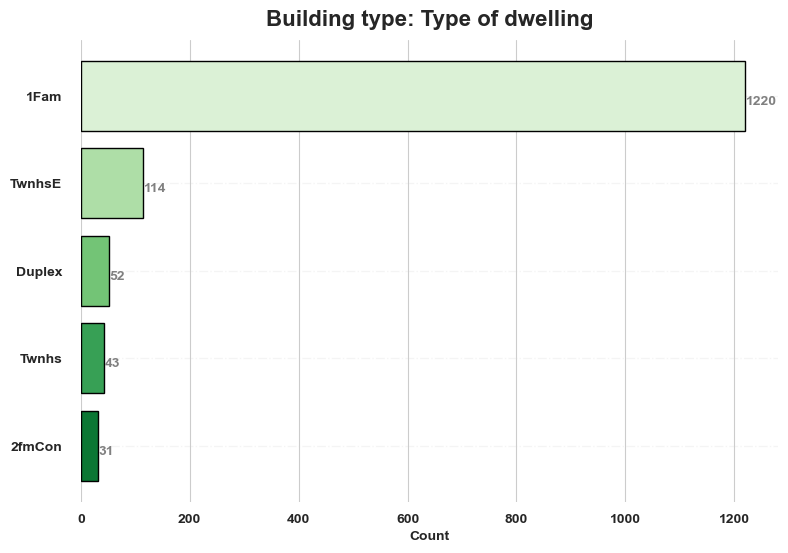

In [36]:
horizontal_plot(df, 'BldgType', 'Greens', 'Building type: Type of dwelling')

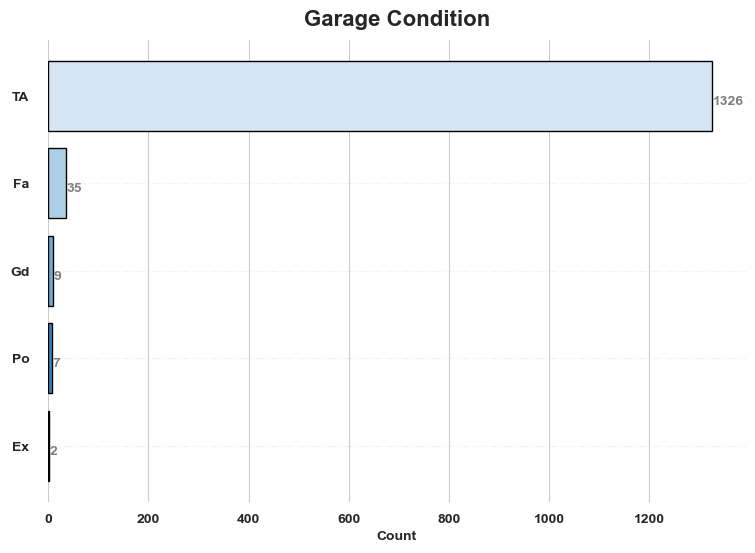

In [37]:
horizontal_plot(df, 'GarageCond', 'Blues', 'Garage Condition')

Most of the houses have Typically Average Garage Condition. Only couple of houses have Excellent Garage Condition.

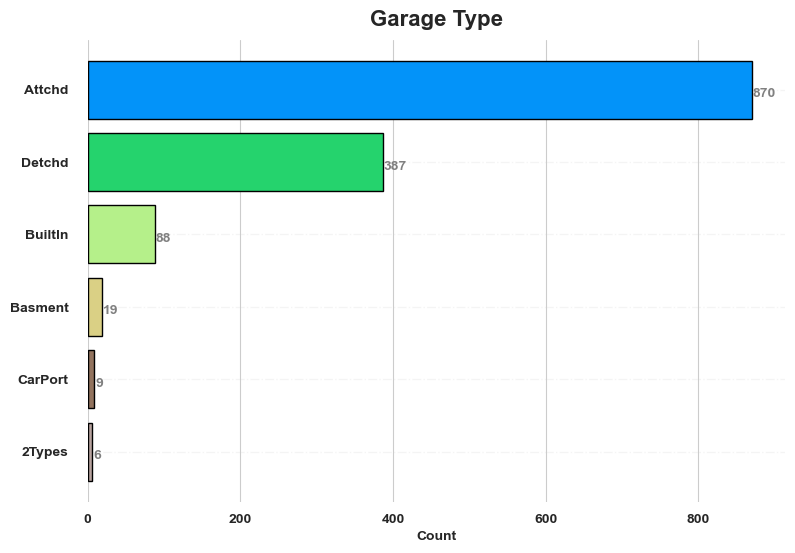

In [38]:
horizontal_plot(df, 'GarageType', 'terrain', 'Garage Type')

Most of the houses have Attached Garages and only 19 have Garages in the Basement.

## Feature Engineering (Data Preprocessing)
Tiền xử lý dữ liệu


First let's combine the train and test features.

In [39]:
y = df['SalePrice'].reset_index(drop = True)
train_features = df.drop('SalePrice', axis = 1)
test_features = test.copy()

df_features = pd.concat((train_features, test_features)).reset_index(drop = True)

In [40]:
df_features.shape

(2919, 80)

Some of the variables given in the description should be of string data type but instead they are stored as numerical data type. First let's change them into string data type

In [41]:
df_features['MSSubClass'] = df_features['MSSubClass'].apply(str)
df_features['MoSold'] = df_features['MoSold'].astype(str)
df_features['YrSold'] = df_features['YrSold'].astype(str)

We have already normalized the target variable in the above section. Let's plot it again    

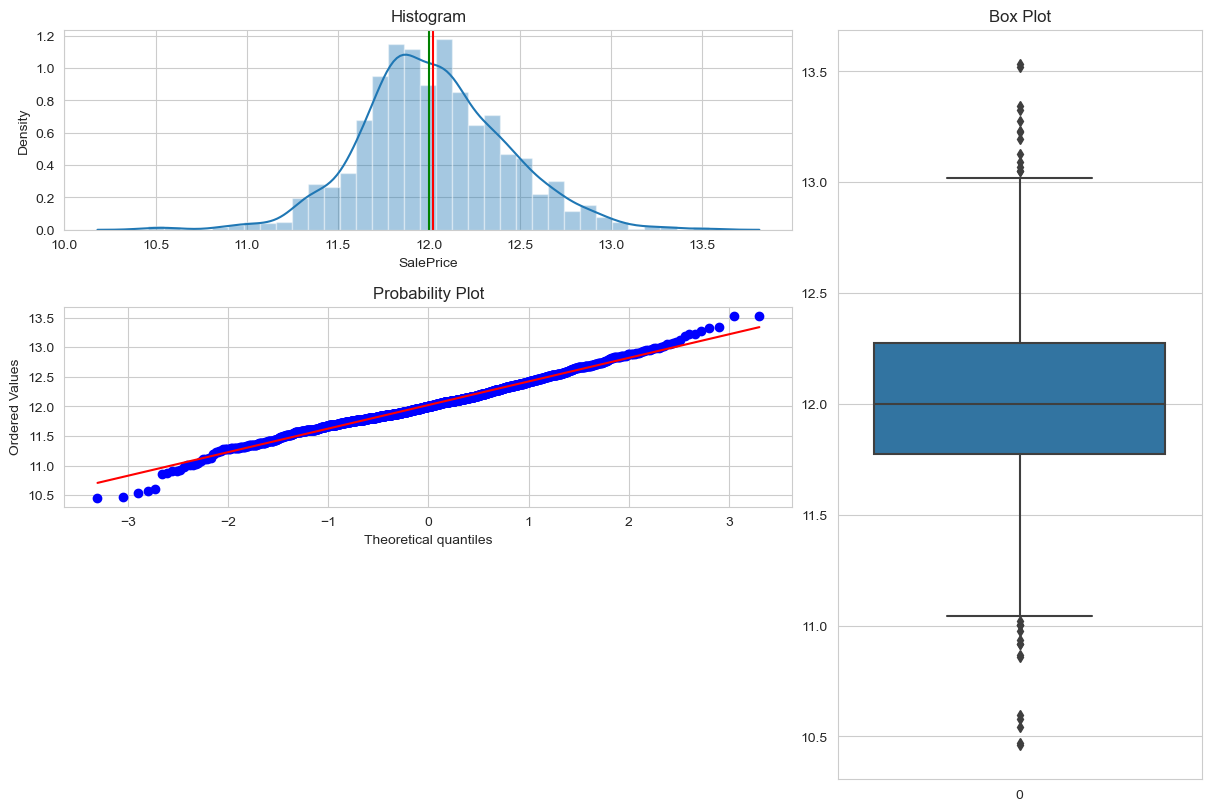

In [42]:
three_chart_plot(df, 'SalePrice')

Let' see the null values statistics of the combined dataset.

In [43]:
null_table(df_features).sort_values(by = 'Approximate Percentage of Null Values').tail(10)

,Columns,Count of Null Values,Approximate Percentage of Null Values
60,GarageFinish,159,5.447071
59,GarageYrBlt,159,5.447071
63,GarageQual,159,5.447071
64,GarageCond,159,5.447071
3,LotFrontage,486,16.649538
57,FireplaceQu,1420,48.646797
73,Fence,2348,80.438506
6,Alley,2721,93.216855
74,MiscFeature,2814,96.402878
72,PoolQC,2909,99.657417


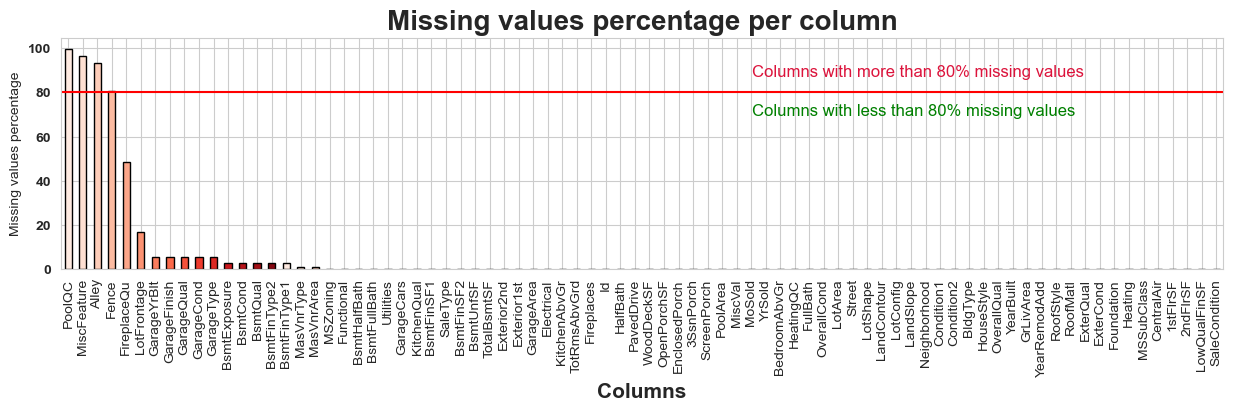

In [44]:
msv_1(df_features, 80, color = sns.color_palette('Reds',15))

We can see that there are 4 features having more than 80% missing values. We will drop these 4 features and some field is not necessary like Id column ...

In [45]:
df_features.head(5)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal


In [46]:
df_features = df_features.drop(['Id','PoolQC', 'MiscFeature', 'Alley', 'Fence'], axis = 1)
df_features.shape
df_features.sample(5)

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition
1565,20,RL,NaN,20062,Pave,IR1,Low,AllPub,Inside,Mod,...,0,0,0,0,0,0,4,2010,WD,Normal
2688,20,FV,72.0,8640,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,60,0,0,0,0,0,10,2006,New,Partial
2024,60,RL,105.0,11025,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,49,0,0,0,0,0,6,2008,WD,Normal
1969,60,RL,108.0,13418,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,182,0,0,0,0,0,10,2008,WD,Abnorml
1955,60,RL,NaN,12511,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,16,0,0,208,0,0,12,2008,WD,Normal


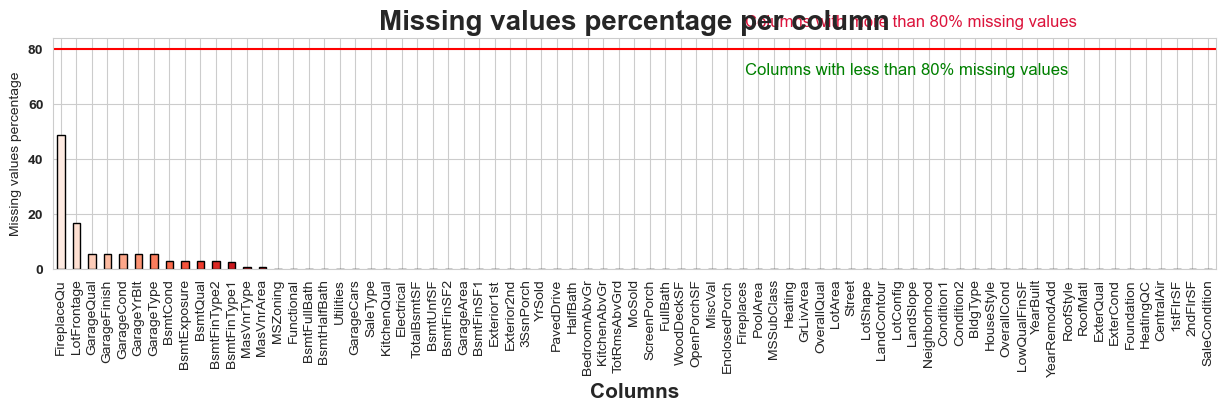

In [47]:
msv_1(df_features, 80, color = sns.color_palette('Reds',15))

Now none of the features have above 80% missing values.

We must observe here that **NA has a different meaning**. Here we can not impute or remove those rows having NA. For example if one of the values for Alley is NA, it means that home has no Alley or if the value of GarageType is NA it means that particular home has no Garage. That's why wee need to take into account these values as it can affect the final prices of the house.

I have identified some of the features which have NA as a category, they are listed in form of a list below. We will replace these null values with None.

Reading through the description of the features is very important, otherwise the above points can't be concluded.

In [48]:
description = open(r'D:\DATN\House_Prediction_Prices\Dataset\data_description.txt')
print(description.read())

MSSubClass: Identifies the type of dwelling involved in the sale.	

        20	1-STORY 1946 & NEWER ALL STYLES
        30	1-STORY 1945 & OLDER
        40	1-STORY W/FINISHED ATTIC ALL AGES
        45	1-1/2 STORY - UNFINISHED ALL AGES
        50	1-1/2 STORY FINISHED ALL AGES
        60	2-STORY 1946 & NEWER
        70	2-STORY 1945 & OLDER
        75	2-1/2 STORY ALL AGES
        80	SPLIT OR MULTI-LEVEL
        85	SPLIT FOYER
        90	DUPLEX - ALL STYLES AND AGES
       120	1-STORY PUD (Planned Unit Development) - 1946 & NEWER
       150	1-1/2 STORY PUD - ALL AGES
       160	2-STORY PUD - 1946 & NEWER
       180	PUD - MULTILEVEL - INCL SPLIT LEV/FOYER
       190	2 FAMILY CONVERSION - ALL STYLES AND AGES

MSZoning: Identifies the general zoning classification of the sale.
		
       A	Agriculture
       C	Commercial
       FV	Floating Village Residential
       I	Industrial
       RH	Residential High Density
       RL	Residential Low Density
       RP	Residential Low Density Park 
       RM

In [49]:
def filling_null(features):
    
    # In the description for 'Functional Feature', it is given that Typ refers to the Typical Functionality
    # We will replace null values in the 'Functional' feature with 'Typ'
    
    features['Functional'] = features['Functional'].fillna('Typ')
    
    # Replace the null values in the below columns with their mode. We are replacing with mode because
    # all of these features are categorical variable, we can't take the mean nor the median.
    
    features['Electrical'] = features['Electrical'].fillna(features['Electrical'].mode()[0])
    
    features['KitchenQual'] = features['KitchenQual'].fillna(features['KitchenQual'].mode()[0])
    
    features['Exterior1st'] = features['Exterior1st'].fillna(features['Exterior1st'].mode()[0])
    
    features['Exterior2nd'] = features['Exterior2nd'].fillna(features['Exterior2nd'].mode()[0])

    features['SaleType'] = features['SaleType'].fillna(features['SaleType'].mode()[0])
    
    # In order to fill the null values for MSZoing, we will take into account the MSSubClass featue.
    # We are doing so because the type of dwelling in a given area largely affects the zone of the area.
    
    features['MSZoning'] = features.groupby('MSSubClass')['MSZoning'].transform(lambda x: x.fillna(x.mode()[0]))
    
    # In order to fill the null values for LotFrontage(Linear feet of street connected to property) 
    # we will fill it with mdef filling_null(features):
    
    # In the description for 'Functional Feature', it is given that Typ refers to the Typical Functionality
    # We will replace null values in the 'Functional' feature with 'Typ'
    
    features['Functional'] = features['Functional'].fillna('Typ')
    
    # Replace the null values in the below columns with their mode. We are replacing with mode because
    # all of these features are categorical variable, we can't take the mean nor the median.
    
    features['Electrical'] = features['Electrical'].fillna(features['Electrical'].mode()[0])
    
    features['KitchenQual'] = features['KitchenQual'].fillna(features['KitchenQual'].mode()[0])
    
    features['Exterior1st'] = features['Exterior1st'].fillna(features['Exterior1st'].mode()[0])
    
    features['Exterior2nd'] = features['Exterior2nd'].fillna(features['Exterior2nd'].mode()[0])

    features['SaleType'] = features['SaleType'].fillna(features['SaleType'].mode()[0])
    
    # In order to fill the null values for MSZoing, we will take into account the MSSubClass featue.
    # We are doing so because the type of dwelling in a given area largely affects the zone of the area.
    
    features['MSZoning'] = features.groupby('MSSubClass')['MSZoning'].transform(lambda x: x.fillna(x.mode()[0]))
    
    # In ordeedian of the values grouped by Neighborhood.
    
    features['LotFrontage'] = features.groupby('Neighborhood')['LotFrontage'].transform(lambda x: x.fillna(x.median()))
    
    # As mentioned before that the 'NA' value in many columns represent the absence of that feature for
    # a particular house, we will replace those null values with None.
    # 'None' for categorical feature and 0 for numerical feature.
    
    cat_features = features.select_dtypes(include = 'object').columns
    num_features = features.select_dtypes(exclude = 'object').columns
    
    features[cat_features] = features[cat_features].fillna('None')
    features[num_features] = features[num_features].fillna(0)
        
    return features

In [50]:
df_features = filling_null(df_features)
df_features.shape

(2919, 75)

<Axes: >

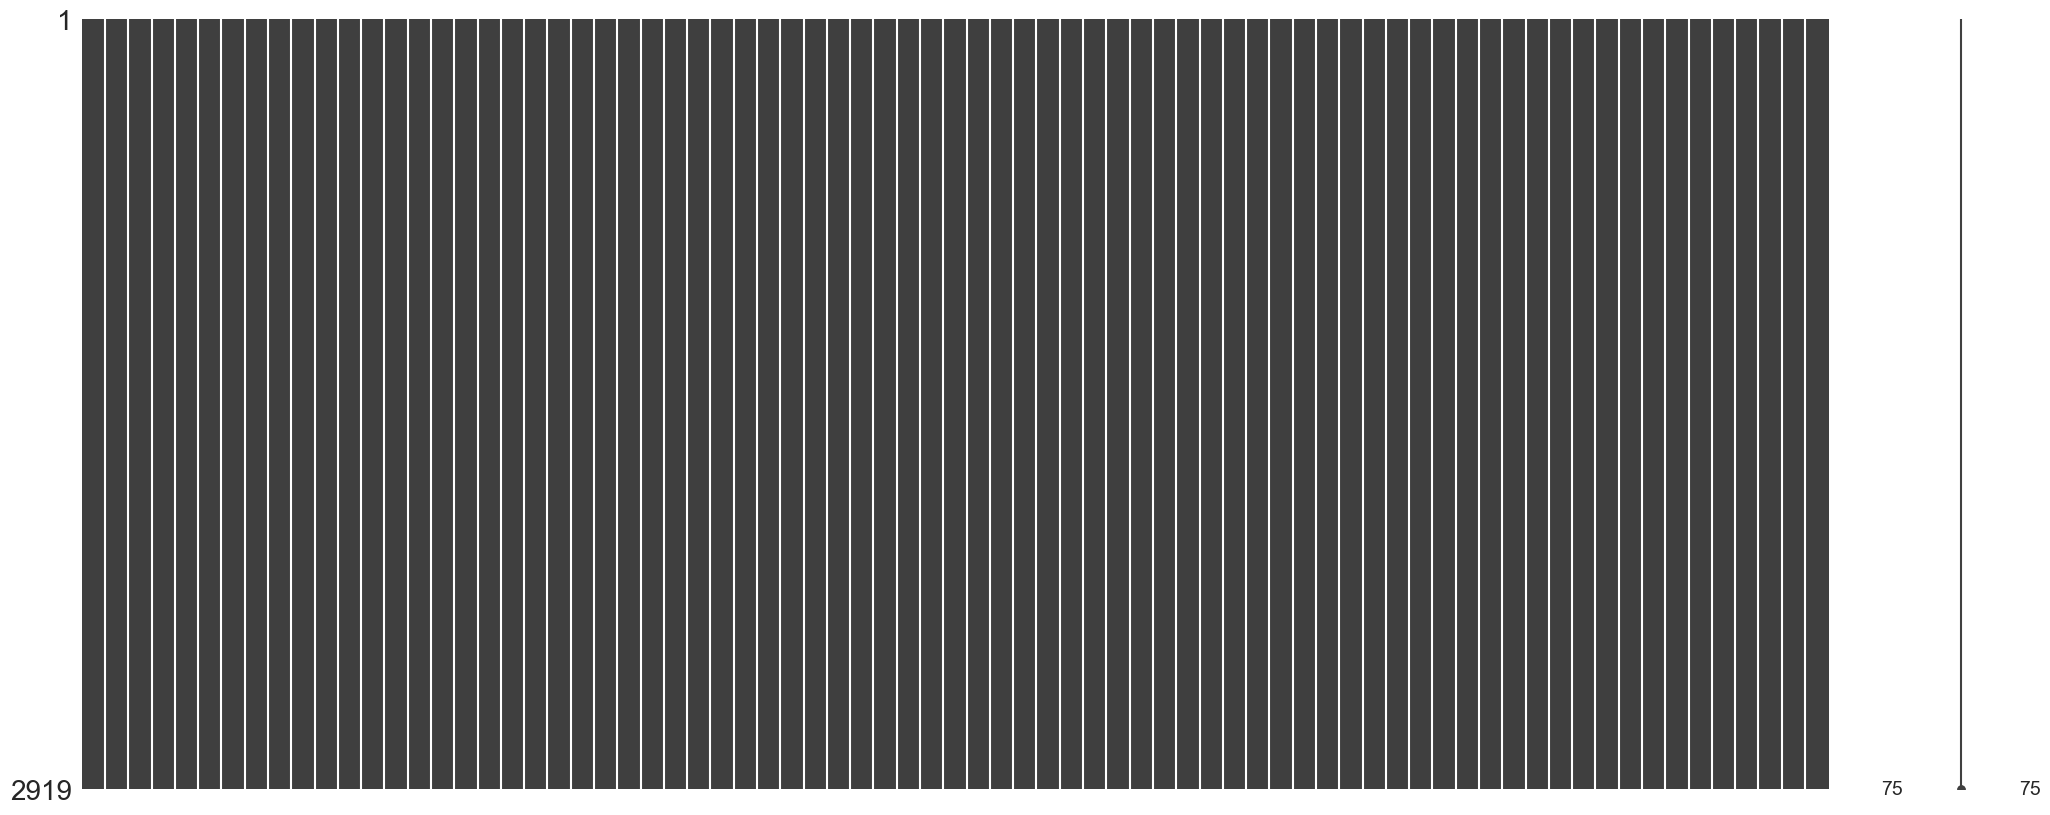

In [51]:
msno.matrix(df_features)

In [52]:
df_features.isnull().sum().sum()

0

Now there are 0 null values in the given dataset

#### Features creation

In [53]:
def new_features(features):
    
    features['HasPool'] = features['PoolArea'].apply(lambda x: 1 if x > 0 else 0)
    features['Has2ndFloor'] = features['2ndFlrSF'].apply(lambda x : 1 if x > 0 else 0)
    features['HasGarage'] = features['GarageArea'].apply(lambda x: 1 if x > 0 else 0)
    features['HasBsmt'] = features['TotalBsmtSF'].apply(lambda x: 1 if x > 0 else 0)
    features['HasFireplace'] = features['Fireplaces'].apply(lambda x: 1 if x > 0 else 0)
    
    # Adding total sqfootage features 
    # In order to get the total area of the house we have to add the basement area, 1st floor area and 2nd floor area.
    
    features['TotalSF'] = features['TotalBsmtSF'] + features['1stFlrSF'] + features['2ndFlrSF']
    
    # Total number of bathrooms = number of full bathrooms + 0.5 * number of half bathrooms
    # + number of bathrooms in basement + 0.5 * number of half bathrooms in the basement.
    
    features['Total_Bathrooms'] = (features['FullBath'] + (0.5 * features['HalfBath']) +
                                   features['BsmtFullBath'] + (0.5 * features['BsmtHalfBath']))
    
    features['Total_porch_sf'] = (features['OpenPorchSF'] + features['3SsnPorch'] +
                                  features['EnclosedPorch'] + features['ScreenPorch'])

    # Add years since remodel
    features['YearsSinceRemodel'] = features['YrSold'].astype(int) - features['YearRemodAdd'].astype(int)

    return features

We have added certain features which are quite intuitive and are taken into consideration in real life too while buying the house. Like what's the total area in square feet of the house or how many bathrooms are there in the house. We could also look for the availability of swimming pool, garage, fireplace and basement in the house. That's why I have added such features in the dataset.

In [54]:
df_features = new_features(df_features)
df_features.shape

(2919, 84)

Let's analyse the skewness of the numerical features.

In [55]:
num_features = df_features.select_dtypes(exclude = 'object').columns

skewed_features = df_features[num_features].apply(lambda x : x.skew()).sort_values(ascending = False)
skew_features = pd.DataFrame({'Skew Value' : skewed_features})

skew_features.head(10)

,Skew Value
MiscVal,21.958480
PoolArea,16.907017
HasPool,14.891972
LotArea,12.829025
LowQualFinSF,12.094977
3SsnPorch,11.381914
KitchenAbvGr,4.304467
BsmtFinSF2,4.148275
EnclosedPorch,4.005950
ScreenPorch,3.948723


#### Remove Outlies

There's is quite a lot of asymmetry in the above features. We will need to fix the skewness

In [56]:
def fix_skew(features):
    
    from scipy.special import boxcox1p
    from scipy.stats import boxcox_normmax
    
    ## Getting all the data that are not of "object" type. 
    numerical_columns = features.select_dtypes(exclude = 'object').columns

    # Check the skew of all numerical features
    skewed_features = features[numerical_columns].apply(lambda x: x.skew()).sort_values(ascending=False)
    
    high_skew = skewed_features[abs(skewed_features) > 0.5]
    skewed_features = high_skew.index

    # Perform the Box-Cox transformation
    for column in skewed_features:
        features[column] = boxcox1p(features[column], boxcox_normmax(features[column] + 1))
        
    return features

In [57]:
df_features = fix_skew(df_features)
df_features.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,SaleCondition,HasPool,Has2ndFloor,HasGarage,HasBsmt,HasFireplace,TotalSF,Total_Bathrooms,Total_porch_sf,YearsSinceRemodel
0,60,RL,14.663551,13.424521,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,Normal,0.0,1,0.712447,39.820328,0,22.970609,3.5,12.335086,5
1,20,RL,16.494888,13.694528,Pave,Reg,Lvl,AllPub,FR2,Gtl,...,Normal,0.0,0,0.712447,39.820328,1,22.864282,2.5,0.000000,31
2,60,RL,15.044952,14.034134,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,Normal,0.0,1,0.712447,39.820328,1,23.315715,3.5,10.087679,6
3,70,RL,14.008495,13.683422,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,Abnorml,0.0,1,0.712447,39.820328,1,22.733344,2.0,28.151353,36
4,60,RL,16.954473,14.550143,Pave,IR1,Lvl,AllPub,FR2,Gtl,...,Normal,0.0,1,0.712447,39.820328,1,24.733055,3.5,14.600892,8


In [58]:
df_features.describe()

,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,...,MiscVal,HasPool,Has2ndFloor,HasGarage,HasBsmt,HasFireplace,TotalSF,Total_Bathrooms,Total_porch_sf,YearsSinceRemodel
count,2919.000000,2919.000000,2919.000000,2919.000000,2.919000e+03,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,...,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000
mean,15.035640,13.558562,6.089072,4.367477,2.417605e+51,1984.264474,8.050213,72.169067,1.159759,60.159760,...,0.249039,0.186148,0.428571,0.673884,38.742628,0.513532,22.691376,2.218397,11.634524,23.528263
std,2.684571,1.070188,1.409947,0.760785,5.517238e+50,20.894344,10.974236,63.054007,3.245977,32.732512,...,1.317411,2.783615,0.494956,0.161233,6.462757,0.499902,1.982664,0.808840,9.623832,20.892061
min,7.529561,9.773730,1.000000,0.926252,1.032105e+51,1950.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,12.544841,1.000000,0.000000,-2.000000
25%,14.008495,13.168581,5.000000,3.989638,2.036479e+51,1965.000000,0.000000,0.000000,0.000000,37.875359,...,0.000000,0.000000,0.000000,0.712447,39.820328,0.000000,21.408684,1.500000,0.000000,4.000000
50%,15.294723,13.661723,6.000000,3.989638,2.386000e+51,1993.000000,0.000000,75.846061,0.000000,59.503738,...,0.000000,0.000000,0.000000,0.712447,39.820328,1.000000,22.668405,2.000000,11.088640,15.000000
75%,16.494888,14.094652,7.000000,4.677073,2.987254e+51,2004.000000,17.798204,120.877955,0.000000,82.236292,...,0.000000,0.000000,1.000000,0.712447,39.820328,1.000000,23.979332,2.500000,18.718895,43.000000
max,34.887145,21.234923,10.000000,6.633459,3.208886e+51,2010.000000,49.871824,475.812687,14.376851,154.089488,...,10.605446,41.797413,1.000000,0.712447,39.820328,1.000000,34.806003,7.000000,54.680282,60.000000


In [59]:
def find_outliers_iqr(data):

    outlier_counts = {} 
    
    num_features = data.select_dtypes(include=np.number).columns
    for feature in num_features:
        Q1 = np.percentile(data[feature], 25)
        Q3 = np.percentile(data[feature], 75)
        IQR = Q3 - Q1
        
        lower_cutoff = Q1 - 1.5 * IQR
        upper_cutoff = Q3 + 1.5 * IQR
        
       
        outliers = data[(data[feature] < lower_cutoff) | (data[feature] > upper_cutoff)]
        outlier_counts[feature] = len(outliers)
    
    
    df_outliers = pd.DataFrame(list(outlier_counts.items()), columns=['Feature', 'Outlier_Count'])
    df_outliers = df_outliers.sort_values(by='Outlier_Count', ascending=False)
    
    return df_outliers
df_outliers = find_outliers_iqr(df_features)
print(df_outliers.head(10))

          Feature  Outlier_Count
28  EnclosedPorch            459
8      BsmtFinSF2            347
1         LotArea            257
30    ScreenPorch            256
3     OverallCond            252
0     LotFrontage            248
16   BsmtHalfBath            175
23    GarageYrBlt            160
35      HasGarage            158
20   KitchenAbvGr            134


#### Onehotencoder


In [60]:
df_features = pd.get_dummies(df_features).reset_index(drop=True)
df_features.shape

(2919, 325)

In [61]:
df_features.head(10)

,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,14.663551,13.424521,7,3.989638,3.035228e+51,2003,19.378557,117.855872,0.000000,30.016555,...,0,0,0,1,0,0,0,0,1,0
1,16.494888,13.694528,6,5.996435,2.444521e+51,1976,0.000000,146.805810,0.000000,44.178889,...,0,0,0,1,0,0,0,0,1,0
2,15.044952,14.034134,7,3.989638,2.987254e+51,2002,17.721068,91.575291,0.000000,56.957796,...,0,0,0,1,0,0,0,0,1,0
3,14.008495,13.683422,7,3.989638,1.482565e+51,1970,0.000000,52.776371,0.000000,64.881737,...,0,0,0,1,1,0,0,0,0,0
4,16.954473,14.550143,8,3.989638,2.963534e+51,2000,25.323125,112.040333,0.000000,61.233859,...,0,0,0,1,0,0,0,0,1,0
5,17.067704,14.527690,5,3.989638,2.802373e+51,1995,0.000000,120.766693,0.000000,17.730052,...,0,0,0,1,0,0,0,0,1,0
6,15.904480,13.799372,8,3.989638,3.059485e+51,2005,18.909628,184.077267,0.000000,47.194866,...,0,0,0,1,0,0,0,0,1,0
7,16.494888,13.861652,7,4.677073,2.386000e+51,1973,21.292508,134.521191,4.748093,37.457484,...,0,0,0,1,0,0,0,0,1,0
8,12.759262,12.754395,7,3.989638,1.692937e+51,1950,0.000000,0.000000,0.000000,90.816886,...,0,0,0,1,1,0,0,0,0,0
9,12.614126,13.152360,5,4.677073,1.808321e+51,1950,0.000000,133.675691,0.000000,28.778206,...,0,0,0,1,0,0,0,0,1,0


#### Features Scaler

In [62]:
from sklearn.preprocessing import MinMaxScaler

# Create MinMaxScaler
scaler = MinMaxScaler()

# Using Min-Max Scaling on features
scaled_features = scaler.fit_transform(df_features)

# Converting array scaled_features to DataFrame
scaled_df = pd.DataFrame(scaled_features, 
                         columns=df_features.columns)
scaled_df.head(10)

,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,0.260768,0.318535,0.666667,0.536757,0.920222,0.883333,0.388567,0.247694,0.00000,0.194799,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.327709,0.342093,0.555556,0.888383,0.648855,0.433333,0.000000,0.308537,0.00000,0.286709,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.274710,0.371724,0.666667,0.536757,0.898183,0.866667,0.355332,0.192461,0.00000,0.369641,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.236824,0.341124,0.666667,0.536757,0.206939,0.333333,0.000000,0.110918,0.00000,0.421065,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
4,0.344508,0.416747,0.777778,0.536757,0.887286,0.833333,0.507764,0.235472,0.00000,0.397392,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
5,0.348647,0.414788,0.444444,0.536757,0.813250,0.750000,0.000000,0.253811,0.00000,0.115063,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
6,0.306128,0.351241,0.777778,0.536757,0.931366,0.916667,0.379165,0.386869,0.00000,0.306282,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
7,0.327709,0.356675,0.666667,0.657208,0.621971,0.383333,0.426945,0.282719,0.33026,0.243089,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
8,0.191161,0.260066,0.666667,0.536757,0.303582,0.000000,0.000000,0.000000,0.00000,0.589378,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
9,0.185856,0.294789,0.444444,0.657208,0.356589,0.000000,0.000000,0.280942,0.00000,0.186763,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0


In [63]:
scaled_df.describe()

,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
count,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,...,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000
mean,0.274369,0.330230,0.565452,0.602961,0.636490,0.571075,0.161418,0.151675,0.080668,0.390421,...,0.002741,0.081877,0.002398,0.865365,0.065091,0.004111,0.008222,0.015759,0.822885,0.083933
std,0.098129,0.093375,0.156661,0.133302,0.253459,0.348239,0.220049,0.132519,0.225778,0.212425,...,0.052289,0.274225,0.048920,0.341392,0.246728,0.063996,0.090317,0.124562,0.381832,0.277335
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.236824,0.296204,0.444444,0.536757,0.461403,0.250000,0.000000,0.000000,0.000000,0.245801,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
50%,0.283839,0.339231,0.555556,0.536757,0.621971,0.716667,0.000000,0.159403,0.000000,0.386164,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,0.327709,0.377005,0.666667,0.657208,0.898183,0.900000,0.356879,0.254045,0.000000,0.533692,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


## Training and Testing Machine Learning Models

In [64]:
features = scaled_df
X = features.iloc[:len(y), :]
test = features.iloc[len(y):, :]

In [65]:
X.shape, test.shape, y.shape

((1460, 325), (1459, 325), (1460,))

In [66]:
seed = 2024
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = seed)

In [67]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [68]:
def evaluation(model, x_train_std, y_train, x_test, y_test, train = True):
    if train == True:
        pred = model.predict(x_train_std)
        
        print("Train Result:\n================================================")
        print(f"Root Mean Squared Error: {np.sqrt(mean_squared_error(y_train, pred))}")
        print("_______________________________________________")
        print(f"Mean Squared Error: {mean_squared_error(y_train, pred)}")
        print("_______________________________________________")
        print(f"Mean Absolute Error: \n{mean_absolute_error(y_train, pred)}")
        print("_______________________________________________")
        
    print()
    
    if train == False:
        pred = model.predict(x_test)
        
        print("Test Result:\n================================================")
        print(f"Root Mean Squared Error: {np.sqrt(mean_squared_error(y_test, pred))}")
        print("_______________________________________________")
        print(f"Mean Squared Error: {mean_squared_error(y_test, pred)}")
        print("_______________________________________________")
        print(f"Mean Absolute Error: \n{mean_absolute_error(y_test, pred)}")
        print("_______________________________________________")

#### Lasso Regression

In [69]:
from sklearn.linear_model import Lasso
ls = Lasso(alpha = 0.01)
ls.fit(X_train, y_train)

evaluation(ls, X_train, y_train, X_test, y_test, True)
evaluation(ls, X_train, y_train, X_test, y_test, False)

Train Result:
Root Mean Squared Error: 0.1810335585225871
_______________________________________________
Mean Squared Error: 0.03277314931135097
_______________________________________________
Mean Absolute Error: 
0.12875466725423662
_______________________________________________


Test Result:
Root Mean Squared Error: 0.1839582535015881
_______________________________________________
Mean Squared Error: 0.03384063903135454
_______________________________________________
Mean Absolute Error: 
0.13573469538664443
_______________________________________________


#### Ridge Regression

In [70]:
from sklearn.linear_model import Ridge
ridge = Ridge(alpha = 0.1)
ridge.fit(X_train, y_train)

evaluation(ridge, X_train, y_train, X_test, y_test, True)
evaluation(ridge, X_train, y_train, X_test, y_test, False)

Train Result:
Root Mean Squared Error: 0.08675696948352343
_______________________________________________
Mean Squared Error: 0.007526771753965015
_______________________________________________
Mean Absolute Error: 
0.059246226133028046
_______________________________________________


Test Result:
Root Mean Squared Error: 0.16634479129946686
_______________________________________________
Mean Squared Error: 0.02767058959246319
_______________________________________________
Mean Absolute Error: 
0.0962155494112793
_______________________________________________


#### XGB Regressor

In [71]:
import xgboost as xgb
xgb_regress = xgb.XGBRegressor(n_estimators = 1000, learning_rate = 0.1)
xgb_regress.fit(X_train, y_train)

evaluation(xgb_regress, X_train, y_train, X_test, y_test, True)
evaluation(xgb_regress, X_train, y_train, X_test, y_test, False)

Train Result:
Root Mean Squared Error: 0.0014315996636884187
_______________________________________________
Mean Squared Error: 2.0494775970727936e-06
_______________________________________________
Mean Absolute Error: 
0.0009651784502101166
_______________________________________________


Test Result:
Root Mean Squared Error: 0.1299252659428975
_______________________________________________
Mean Squared Error: 0.01688057473033264
_______________________________________________
Mean Absolute Error: 
0.09066840305725458
_______________________________________________


## Submission

Ridge Regression

In [72]:
test_pred = ridge.predict(test)
submission_ridge = pd.DataFrame(test_id, columns = ['Id'])
test_pred = np.expm1(test_pred)
submission_ridge['SalePrice'] = test_pred 
submission_ridge.head()

,Id,SalePrice
0,1461,121339.271997
1,1462,165764.084996
2,1463,186152.275215
3,1464,199045.709671
4,1465,199546.307669


XGB Regressor

In [73]:
test_pred = xgb_regress.predict(test)
submission_xgb = pd.DataFrame(test_id, columns = ['Id'])
test_pred = np.expm1(test_pred)
submission_xgb['SalePrice'] = test_pred 
submission_xgb.head()

,Id,SalePrice
0,1461,121319.382812
1,1462,159192.500000
2,1463,181711.296875
3,1464,187090.093750
4,1465,193229.015625


In [74]:
submission_xgb.to_csv("result_xgb.csv", index = False, header = True)

Lasso Regression

In [75]:
test_pred = ls.predict(test)
submission_ls = pd.DataFrame(test_id, columns = ['Id'])
test_pred = np.expm1(test_pred)
submission_ls['SalePrice'] = test_pred  
submission_ls.head()

,Id,SalePrice
0,1461,112141.102654
1,1462,146822.296729
2,1463,182832.948312
3,1464,213616.733575
4,1465,188230.356200


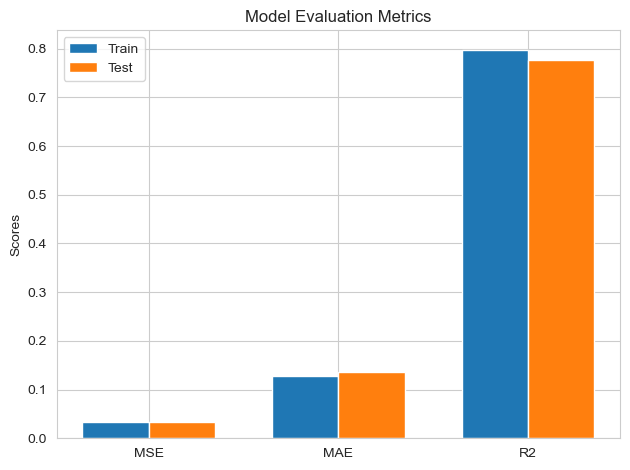

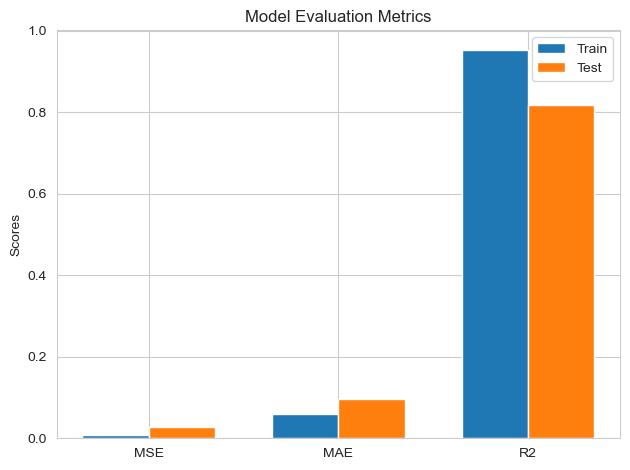

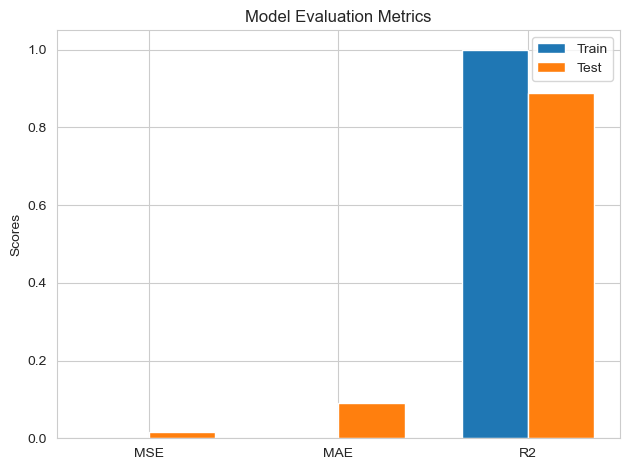

In [76]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

def evaluation(model, X_train, y_train, X_test, y_test, plot=True):
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    train_mse = mean_squared_error(y_train, y_train_pred)
    test_mse = mean_squared_error(y_test, y_test_pred)
    train_mae = mean_absolute_error(y_train, y_train_pred)
    test_mae = mean_absolute_error(y_test, y_test_pred)
    train_r2 = r2_score(y_train, y_train_pred)
    test_r2 = r2_score(y_test, y_test_pred)
    
    if plot:
        metrics = ['MSE', 'MAE', 'R2']
        train_scores = [train_mse, train_mae, train_r2]
        test_scores = [test_mse, test_mae, test_r2]

        x = np.arange(len(metrics))
        width = 0.35  

        fig, ax = plt.subplots()
        rects1 = ax.bar(x - width/2, train_scores, width, label='Train')
        rects2 = ax.bar(x + width/2, test_scores, width, label='Test')

        ax.set_ylabel('Scores')
        ax.set_title('Model Evaluation Metrics')
        ax.set_xticks(x)
        ax.set_xticklabels(metrics)
        ax.legend()

        fig.tight_layout()

        plt.show()
    else:
        print("Train MSE:", train_mse)
        print("Test MSE:", test_mse)
        print("Train MAE:", train_mae)
        print("Test MAE:", test_mae)
        print("Train R2 Score:", train_r2)
        print("Test R2 Score:", test_r2)

# Assuming X_train, y_train, X_test, y_test are defined

# Train and evaluate Lasso Regression
ls = Lasso(alpha=0.01)
ls.fit(X_train, y_train)
evaluation(ls, X_train, y_train, X_test, y_test, True)

# Train and evaluate Ridge Regression
ridge = Ridge(alpha=0.1)
ridge.fit(X_train, y_train)
evaluation(ridge, X_train, y_train, X_test, y_test, True)

# Train and evaluate XGBoost Regressor
xgb_regress = xgb.XGBRegressor(n_estimators=1000, learning_rate=0.1)
xgb_regress.fit(X_train, y_train)
evaluation(xgb_regress, X_train, y_train, X_test, y_test, True)

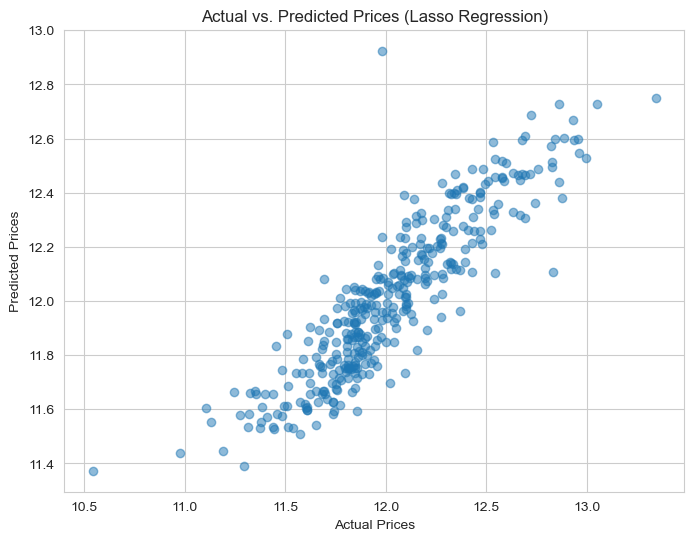

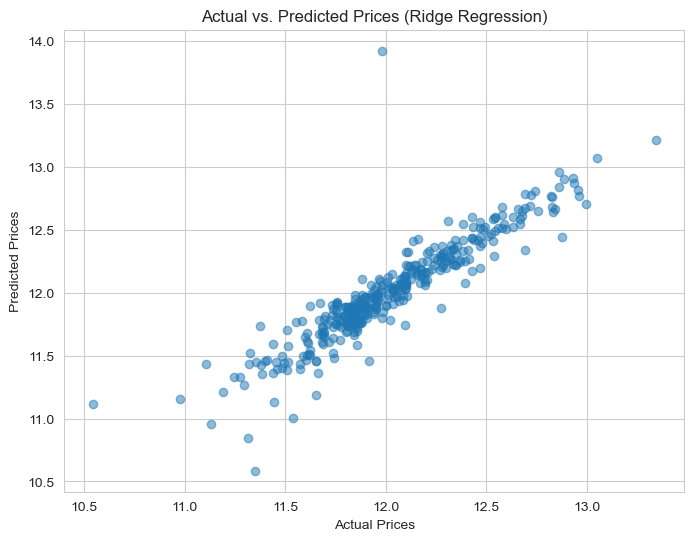

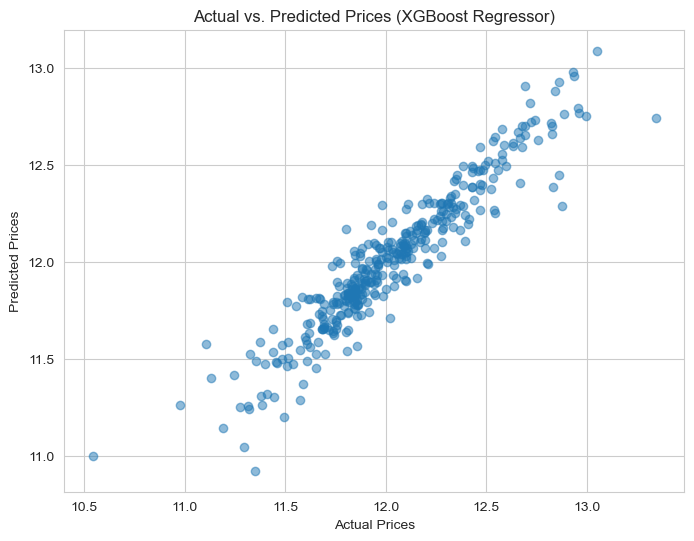

In [77]:
import matplotlib.pyplot as plt

def plot_predictions(y_true, y_pred, model_name):
    plt.figure(figsize=(8, 6))
    plt.scatter(y_true, y_pred, alpha=0.5)
    plt.xlabel('Actual Prices')
    plt.ylabel('Predicted Prices')
    plt.title(f'Actual vs. Predicted Prices ({model_name})')
    plt.show()
# Lasso Regression
ls_y_pred = ls.predict(X_test)
plot_predictions(y_test, ls_y_pred, "Lasso Regression")

# Ridge Regression
ridge_y_pred = ridge.predict(X_test)
plot_predictions(y_test, ridge_y_pred, "Ridge Regression")

# XGBoost Regressor
xgb_y_pred = xgb_regress.predict(X_test)
plot_predictions(y_test, xgb_y_pred, "XGBoost Regressor")

In [78]:
def plot_hist_predictions(y_true, y_pred, model_name):
    plt.figure(figsize=(12, 6))

    # Histogram of Actual Prices
    plt.subplot(1, 2, 1)
    plt.hist(y_true, bins=30, color='blue', alpha=0.7, label='Actual Prices')
    plt.xlabel('Actual Prices')
    plt.ylabel('Frequency')
    plt.title(f'Actual Prices Distribution ({model_name})')
    plt.legend()

    # Histogram of Predicted Prices
    plt.subplot(1, 2, 2)
    plt.hist(y_pred, bins=30, color='red', alpha=0.7, label='Predicted Prices')
    plt.xlabel('Predicted Prices')
    plt.ylabel('Frequency')
    plt.title(f'Predicted Prices Distribution ({model_name})')
    plt.legend()

    plt.tight_layout()
    plt.show()

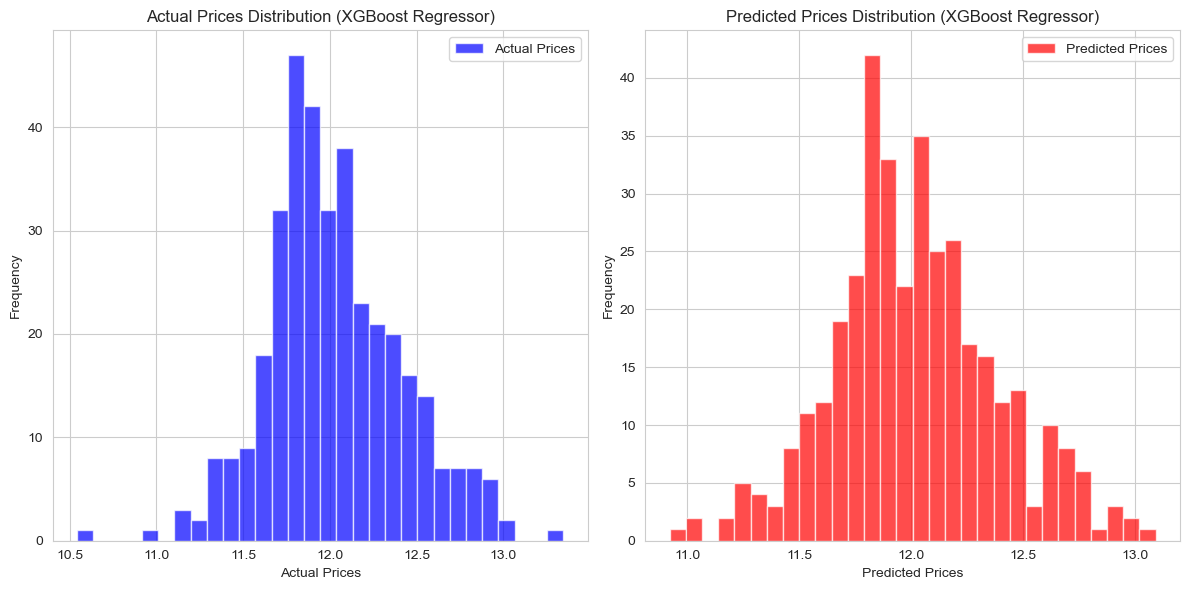

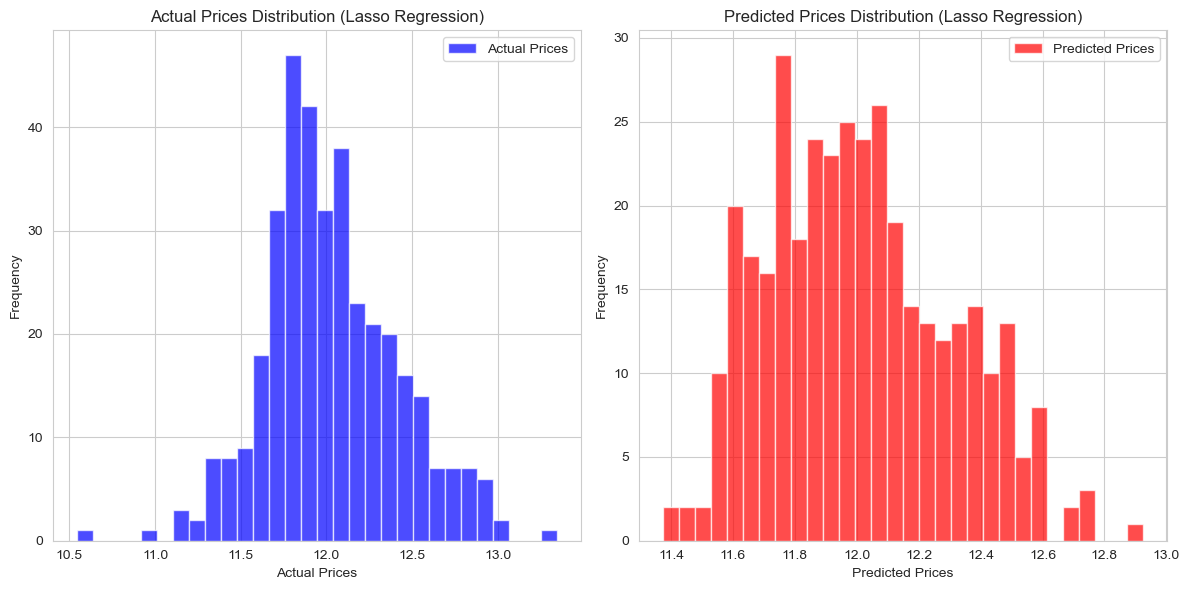

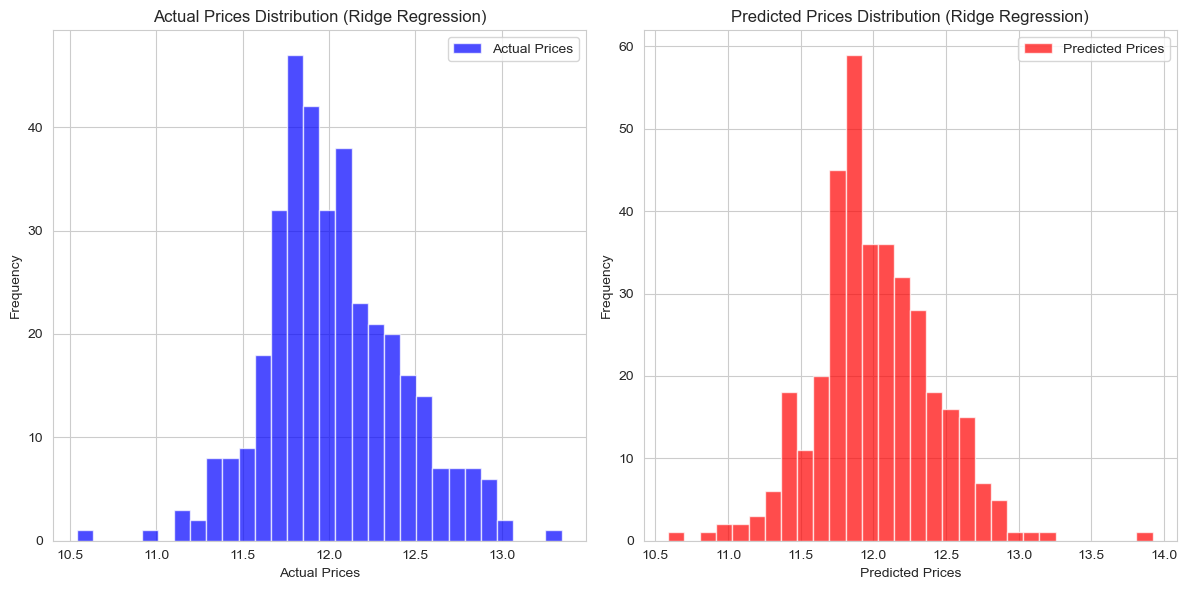

In [79]:
# XGBoost Regressor
xgb_y_pred = xgb_regress.predict(X_test)
plot_hist_predictions(y_test, xgb_y_pred, "XGBoost Regressor")

# Lasso Regression
ls_y_pred = ls.predict(X_test)
plot_hist_predictions(y_test, ls_y_pred, "Lasso Regression")

# Ridge Regression
ridge_y_pred = ridge.predict(X_test)
plot_hist_predictions(y_test, ridge_y_pred, "Ridge Regression")

In [80]:
import matplotlib.pyplot as plt
import numpy as np

def calculate_error_percent(y_true, y_pred):
    # Tính toán sai lệch giữa giá trị thực và giá trị dự đoán
    errors = np.abs(y_true - y_pred)
    
    # Tính phần trăm sai lệch
    error_percent = (errors / y_true) * 100
    
    return error_percent

def plot_error_distribution(error_percent, model_name):
    # Vẽ biểu đồ histogram của phần trăm sai lệch
    plt.figure(figsize=(8, 6))
    plt.hist(error_percent, bins=30, color='green', alpha=0.7)
    plt.xlabel('Error Percentage')
    plt.ylabel('Frequency')
    plt.title(f'Error Percentage Distribution ({model_name})')
    plt.show()

    # Tính tỷ lệ các khoảng phần trăm sai lệch
    bins = [0, 5, 10, 20, 30, 40, 50, 100]
    bin_counts, _ = np.histogram(error_percent, bins=bins)
    bin_labels = [f'{bins[i]}-{bins[i+1]}%' for i in range(len(bins)-1)]

    # Vẽ biểu đồ tròn tỷ lệ các khoảng phần trăm sai lệch
    plt.figure(figsize=(8, 8))
    plt.pie(bin_counts, labels=bin_labels, autopct='%1.1f%%', startangle=140)
    plt.title(f'Error Percentage Breakdown ({model_name})')
    plt.show()



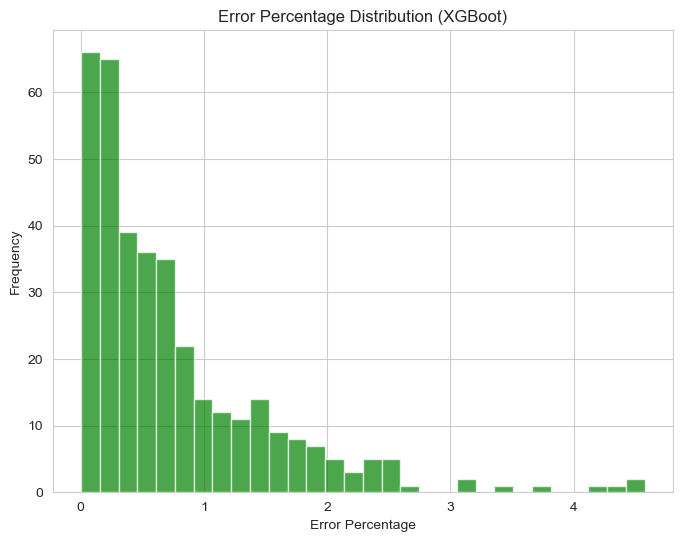

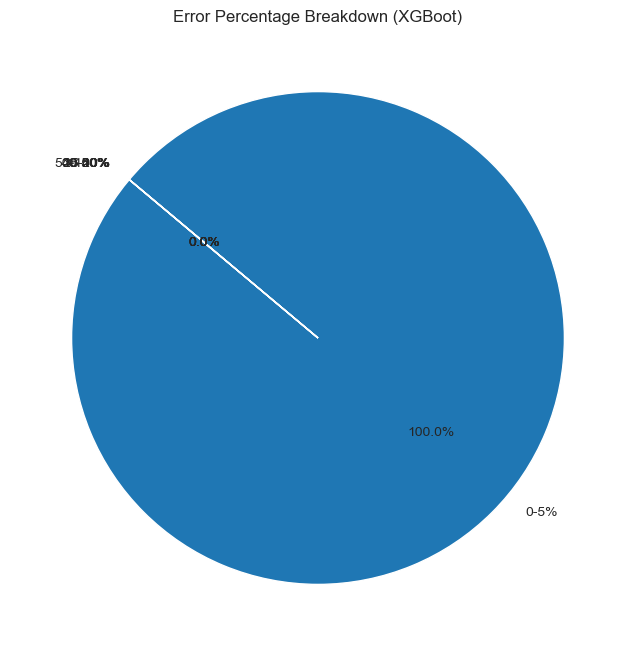

In [81]:
# Tính toán phần trăm sai lệch và vẽ biểu đồ
error_percent = calculate_error_percent(y_test, xgb_y_pred)
plot_error_distribution(error_percent, 'XGBoot')

In [82]:
#https://www.kaggle.com/code/idalez/house-prices-analysis-and-prediction